In [ ]:
import json
import geopandas as gpd

world_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/additional_data/custom.geo.json"

def load_world_geojson(path):
    world = gpd.read_file(path)

    # GeoJSON-Key bestimmen (bei dir: "name")
    if "name" in world.columns:
        world = world.rename(columns={"name": "country"})
    elif "admin" in world.columns:
        world = world.rename(columns={"admin": "country"})
    elif "ADMIN" in world.columns:
        world = world.rename(columns={"ADMIN": "country"})
    else:
        raise ValueError("Kein gültiger Länderschlüssel gefunden!")

    # Centroids
    world["lon"] = world.geometry.centroid.x
    world["lat"] = world.geometry.centroid.y

    return world

world = load_world_geojson(world_path)
GEOJSON_COUNTRIES = set(world["country"])

print("Anzahl Länder:", len(GEOJSON_COUNTRIES))
print(sorted(list(GEOJSON_COUNTRIES))[:20])


Anzahl Länder: 176
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil']


C:\Users\paulk\AppData\Local\Temp\ipykernel_34100\1247409396.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["lon"] = world.geometry.centroid.x
C:\Users\paulk\AppData\Local\Temp\ipykernel_34100\1247409396.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["lat"] = world.geometry.centroid.y


In [50]:
import pandas as pd

csv_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/archive/time_series.csv"

def load_unhcr_data(path):
    df = pd.read_csv(path)
    return df

df = load_unhcr_data(csv_path)

print(df.head())
print("\nSpalten:", df.columns.tolist())
print("Anzahl Zeilen:", len(df))


   Year Country / territory of asylum/residence           Origin  \
0  1951                               Australia  Various/Unknown   
1  1951                                 Austria  Various/Unknown   
2  1951                                 Belgium  Various/Unknown   
3  1951                                  Canada  Various/Unknown   
4  1951                             Switzerland  Various/Unknown   

                            Population type   Value  
0  Refugees (incl. refugee-like situations)  180000  
1  Refugees (incl. refugee-like situations)  282000  
2  Refugees (incl. refugee-like situations)   55000  
3  Refugees (incl. refugee-like situations)  168511  
4  Refugees (incl. refugee-like situations)   10000  

Spalten: ['Year', 'Country / territory of asylum/residence', 'Origin', 'Population type', 'Value']
Anzahl Zeilen: 298441


C:\Users\paulk\AppData\Local\Temp\ipykernel_34100\1530856804.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [51]:
unhcr_origins = set(df["Origin"].dropna().unique())
unhcr_asylums = set(df["Country / territory of asylum/residence"].dropna().unique())

all_unhcr_names = unhcr_origins.union(unhcr_asylums)

print("UNHCR Länder insgesamt:", len(all_unhcr_names))
print("\nBeispiele:", list(sorted(all_unhcr_names))[:2000])


UNHCR Länder insgesamt: 226

Beispiele: ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Rep.', 'Chad', 'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Rep.', "Côte d'Ivoire", "Dem. People's Rep. of Korea", 'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethi

In [52]:
exact_matches = sorted([c for c in all_unhcr_names if c in GEOJSON_COUNTRIES])
missing = sorted([c for c in all_unhcr_names if c not in GEOJSON_COUNTRIES])

print("Exakte Matches:", len(exact_matches))
print("Fehlende Länder:", len(missing))

print("\nBeispiele fehlende Länder:")
print(missing[:2000])


Exakte Matches: 146
Fehlende Länder: 80

Beispiele fehlende Länder:
['American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahrain', 'Barbados', 'Bermuda', 'Bolivia (Plurinational State of)', 'Bonaire', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Brunei Darussalam', 'Cabo Verde', 'Cayman Islands', 'China, Hong Kong SAR', 'China, Macao SAR', 'Comoros', 'Cook Islands', 'Curaçao', 'Czech Rep.', "Dem. People's Rep. of Korea", 'Dem. Rep. of the Congo', 'Dominica', 'Equatorial Guinea', 'French Guiana', 'French Polynesia', 'Gibraltar', 'Grenada', 'Guadeloupe', 'Holy See (the)', 'Iran (Islamic Rep. of)', 'Kiribati', "Lao People's Dem. Rep.", 'Liechtenstein', 'Maldives', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritius', 'Micronesia (Federated States of)', 'Monaco', 'Montserrat', 'Nauru', 'Niue', 'Norfolk Island', 'Palau', 'Palestinian', 'Rep. of Korea', 'Rep. of Moldova', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Gren

In [53]:
import difflib

def fuzzy_match(name, choices, cutoff=0.75):
    matches = difflib.get_close_matches(name, choices, n=3, cutoff=cutoff)
    return matches

# nur einen schnellen Überblick
for c in missing[:30]:  # erste 30 testen
    print(f"{c:35} → {fuzzy_match(c, GEOJSON_COUNTRIES)}")


American Samoa                      → []
Andorra                             → []
Anguilla                            → []
Antigua and Barbuda                 → []
Aruba                               → []
Bahrain                             → []
Barbados                            → []
Bermuda                             → []
Bolivia (Plurinational State of)    → []
Bonaire                             → []
Bosnia and Herzegovina              → ['Bosnia and Herz.']
British Virgin Islands              → []
Brunei Darussalam                   → []
Cabo Verde                          → []
Cayman Islands                      → []
China, Hong Kong SAR                → []
China, Macao SAR                    → []
Comoros                             → []
Cook Islands                        → []
Curaçao                             → []
Czech Rep.                          → []
Dem. People's Rep. of Korea         → []
Dem. Rep. of the Congo              → ['Dem. Rep. Congo']
Dominica              

In [54]:
COUNTRY_REMAP = {

    # --- Länder mit abweichender Schreibweise ---
    "Bolivia (Plurinational State of)": "Bolivia",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "Cabo Verde": "Cape Verde",
    "Czech Rep.": "Czechia",
    "Côte d'Ivoire": "Ivory Coast",
    "Dem. People's Rep. of Korea": "North Korea",
    "Dem. Rep. of the Congo": "Dem. Rep. Congo",
    "Dominican Rep.": "Dominican Republic",
    "Iran (Islamic Rep. of)": "Iran",
    "Lao People's Dem. Rep.": "Laos",
    "Rep. of Korea": "South Korea",
    "Rep. of Moldova": "Moldova",
    "Russian Federation": "Russia",
    "Syrian Arab Rep.": "Syria",
    "United Rep. of Tanzania": "United Republic of Tanzania",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Viet Nam": "Vietnam",
    "Swaziland": "eSwatini",
    "The former Yugoslav Republic of Macedonia": "North Macedonia",

    # --- Politische Spezialfälle ---
    "Serbia and Kosovo (S/RES/1244 (1999))": "Republic of Serbia",
    "State of Palestine": "Palestine",
    "Palestinian": "Palestine",
    "Holy See (the)": "Vatican",

    # --- Territorien, die Natural Earth zusammenfasst ---
    "French Guiana": "France",
    "Guadeloupe": "France",
    "Martinique": "France",
    "Saint-Pierre-et-Miquelon": "France",
    "Puerto Rico": "United States of America",

    "Aruba": "Netherlands",
    "Curaçao": "Netherlands",
    "Bonaire": "Netherlands",
    "Sint Maarten (Dutch part)": "Netherlands",

    "Gibraltar": "United Kingdom",
    "Svalbard and Jan Mayen": "Norway",

    # --- Sehr kleine Territorien → fehlen in GeoJSON → ignorieren ---
    "American Samoa": None,
    "Anguilla": None,
    "Antigua and Barbuda": None,
    "Bermuda": None,
    "British Virgin Islands": None,
    "Cook Islands": None,
    "Cayman Islands": None,
    "Comoros": None,
    "Equatorial Guinea": None,
    "French Polynesia": None,
    "Kiribati": None,
    "Marshall Islands": None,
    "Micronesia (Federated States of)": None,
    "Montserrat": None,
    "Nauru": None,
    "Niue": None,
    "Norfolk Island": None,
    "Palau": None,
    "Saint Kitts and Nevis": None,
    "Saint Lucia": None,
    "Saint Vincent and the Grenadines": None,
    "Samoa": None,
    "San Marino": None,
    "Seychelles": None,
    "Solomon Islands": None,
    "Tonga": None,
    "Turks and Caicos Islands": None,
    "Tuvalu": None,
    "Wallis and Futuna Islands ": None,

    # --- Nicht-Länder → komplett ignorieren ---
    "Stateless": None,
    "Various/Unknown": None,
    "Tibetan": None,
}


In [55]:
def normalize_name(name):
    if name in COUNTRY_REMAP:
        return COUNTRY_REMAP[name]
    if name in GEOJSON_COUNTRIES:
        return name
    return None

unmapped = sorted([c for c in all_unhcr_names if normalize_name(c) is None])

print("Unmapped nach Mapping:", len(unmapped))
print(unmapped)


Unmapped nach Mapping: 49
['American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Bahrain', 'Barbados', 'Bermuda', 'British Virgin Islands', 'Brunei Darussalam', 'Cayman Islands', 'China, Hong Kong SAR', 'China, Macao SAR', 'Comoros', 'Cook Islands', 'Dominica', 'Equatorial Guinea', 'French Polynesia', 'Grenada', 'Kiribati', 'Liechtenstein', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritius', 'Micronesia (Federated States of)', 'Monaco', 'Montserrat', 'Nauru', 'Niue', 'Norfolk Island', 'Palau', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Seychelles', 'Singapore', 'Solomon Islands', 'South Sudan', 'Stateless', 'Tibetan', 'Tonga', 'Turks and Caicos Islands', 'Tuvalu', 'Various/Unknown', 'Wallis and Futuna Islands ', 'Western Sahara']


In [56]:
import difflib

for c in unmapped:
    matches = difflib.get_close_matches(c, GEOJSON_COUNTRIES, n=3, cutoff=0.6)
    print(f"{c:35} → {matches}")


American Samoa                      → []
Andorra                             → ['Angola']
Anguilla                            → ['Angola']
Antigua and Barbuda                 → []
Bahrain                             → ['Brazil', 'Bhutan']
Barbados                            → []
Bermuda                             → []
British Virgin Islands              → []
Brunei Darussalam                   → []
Cayman Islands                      → []
China, Hong Kong SAR                → []
China, Macao SAR                    → []
Comoros                             → []
Cook Islands                        → []
Dominica                            → ['Dominican Rep.', 'Romania']
Equatorial Guinea                   → ['Eq. Guinea']
French Polynesia                    → []
Grenada                             → ['Greenland', 'Canada']
Kiribati                            → []
Liechtenstein                       → []
Maldives                            → ['Mali']
Malta                               → [

In [57]:
for c in unmapped:
    if c in GEOJSON_COUNTRIES:
        print("EXISTS:", c)


In [58]:
def normalize_name(name: str):
    """Map UNHCR country names to GeoJSON country names or None."""
    name = name.strip()

    # Erst Mapping verwenden
    if name in COUNTRY_REMAP:
        return COUNTRY_REMAP[name]

    # Wenn Name direkt im GeoJSON vorkommt → OK
    if name in GEOJSON_COUNTRIES:
        return name

    # Alles andere → None (nicht darstellbar)
    return None


In [59]:
normalized_test = {c: normalize_name(c) for c in all_unhcr_names}

print("Total:", len(normalized_test))
print("Mapping None:", sum(v is None for v in normalized_test.values()))

print("\nBeispiele der 'None'-Länder:")
print([c for c,v in normalized_test.items() if v is None][:30])


Total: 226
Mapping None: 49

Beispiele der 'None'-Länder:
['Various/Unknown', 'Bermuda', 'Micronesia (Federated States of)', 'Tonga', 'Brunei Darussalam', 'Dominica', 'Turks and Caicos Islands', 'Nauru', 'Liechtenstein', 'Barbados', 'South Sudan', 'Cook Islands', 'Marshall Islands', 'Norfolk Island', 'Bahrain', 'Malta', 'Saint Vincent and the Grenadines', 'China, Hong Kong SAR', 'Wallis and Futuna Islands ', 'American Samoa', 'French Polynesia', 'Montserrat', 'China, Macao SAR', 'Western Sahara', 'Saint Kitts and Nevis', 'Niue', 'Monaco', 'Singapore', 'Maldives', 'Tuvalu']


In [60]:
def filter_year(df, year):
    """Filter dataset for a given year and normalize country names."""
    df_year = df[df["Year"] == year].copy()

    # Namen normalisieren
    df_year["Origin_clean"] = df_year["Origin"].apply(normalize_name)
    df_year["Asylum_clean"] = df_year["Country / territory of asylum/residence"].apply(normalize_name)

    # Zeilen entfernen, die keinem GeoJSON-Land zugeordnet werden können
    df_year = df_year.dropna(subset=["Origin_clean", "Asylum_clean"])

    return df_year


In [61]:
YEAR = 2016  # Beispieljahr

df_year = filter_year(df, YEAR)

print("Original rows:", len(df[df['Year']==YEAR]))
print("After cleaning:", len(df_year))
print(df_year.head())


Original rows: 47754
After cleaning: 43750
        Year Country / territory of asylum/residence    Origin  \
250687  2016                                   Aruba  Colombia   
250688  2016                                   Aruba  Colombia   
250689  2016                                   Aruba  Colombia   
250690  2016                                   Aruba  Colombia   
250691  2016                                   Aruba  Colombia   

                                 Population type Value Origin_clean  \
250687                            Asylum-seekers     *     Colombia   
250688              Internally displaced persons     0     Colombia   
250689                         Others of concern     0     Colombia   
250690                             Returned IDPs     0     Colombia   
250691  Refugees (incl. refugee-like situations)     0     Colombia   

       Asylum_clean  
250687  Netherlands  
250688  Netherlands  
250689  Netherlands  
250690  Netherlands  
250691  Netherlands  


In [62]:
def aggregate_flows(df_year):
    """
    Aggregate flows (Origin → Asylum) by summing refugees for that year.
    """
    flows = (
        df_year.groupby(["Origin_clean", "Asylum_clean"])["Value"]
        .sum()
        .reset_index()
    )
    return flows


In [63]:
flows = aggregate_flows(df_year)

print("Number of flows:", len(flows))
print(flows.head(10))


Number of flows: 6233
  Origin_clean Asylum_clean               Value
0  Afghanistan  Afghanistan  017975511142210000
1  Afghanistan      Algeria             0000*00
2  Afghanistan       Angola             *000000
3  Afghanistan    Argentina             *000500
4  Afghanistan      Armenia             *000000
5  Afghanistan    Australia       2077000921700
6  Afghanistan      Austria     297830002022000
7  Afghanistan   Azerbaijan       1060005621120
8  Afghanistan      Belarus           700022700
9  Afghanistan      Belgium       6457000320100


In [64]:
def attach_coordinates(flows, world):
    """
    Adds longitude/latitude for origin and asylum countries.
    """
    # Origin-Koordinaten
    flows = flows.merge(
        world[["country", "lon", "lat"]],
        left_on="Origin_clean",
        right_on="country",
        how="left"
    ).rename(columns={"lon": "origin_lon", "lat": "origin_lat"})
    
    # Asylum-Koordinaten
    flows = flows.merge(
        world[["country", "lon", "lat"]],
        left_on="Asylum_clean",
        right_on="country",
        how="left"
    ).rename(columns={"lon": "asylum_lon", "lat": "asylum_lat"})

    # Überflüssige Spalten entfernen
    flows = flows.drop(columns=["country_x", "country_y"])

    return flows


In [65]:
flows_with_coords = attach_coordinates(flows, world)

print("Rows with coords:", len(flows_with_coords))
print(flows_with_coords.head(10))

# Prüfen, ob Koordinaten fehlen
missing_coords = flows_with_coords[
    flows_with_coords[["origin_lon", "origin_lat", "asylum_lon", "asylum_lat"]]
    .isna()
    .any(axis=1)
]

print("\nFlows WITHOUT coordinates:", len(missing_coords))
print(missing_coords.head())


Rows with coords: 6233
  Origin_clean Asylum_clean               Value  origin_lon  origin_lat  \
0  Afghanistan  Afghanistan  017975511142210000    66.08669   33.856399   
1  Afghanistan      Algeria             0000*00    66.08669   33.856399   
2  Afghanistan       Angola             *000000    66.08669   33.856399   
3  Afghanistan    Argentina             *000500    66.08669   33.856399   
4  Afghanistan      Armenia             *000000    66.08669   33.856399   
5  Afghanistan    Australia       2077000921700    66.08669   33.856399   
6  Afghanistan      Austria     297830002022000    66.08669   33.856399   
7  Afghanistan   Azerbaijan       1060005621120    66.08669   33.856399   
8  Afghanistan      Belarus           700022700    66.08669   33.856399   
9  Afghanistan      Belgium       6457000320100    66.08669   33.856399   

   asylum_lon  asylum_lat  
0   66.086690   33.856399  
1    2.598048   28.185481  
2   17.470573  -12.245869  
3  -65.175361  -35.446821  
4   45.0002

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

def plot_flow_map_median(world, flows, year, title, max_flows=300):
    """
    Flowmap mit:
    - roten Pfeil-Kategorien (5 Stufen)
    - Legende mit konkreten Value-Bereichen
    """

    # Kopie + stärkste Flows zuerst
    flows = flows.sort_values("Value", ascending=False).head(max_flows).copy()

    # 1) Values in saubere Zahlen umwandeln
    values = pd.to_numeric(flows["Value"], errors="coerce")
    mask = values.notna()
    flows = flows[mask].copy()
    values = values[mask].to_numpy()

    if len(values) == 0:
        print("Keine numerischen Werte in 'Value'.")
        return

    vmin, vmax = values.min(), values.max()

    # 2) Bins berechnen (Quantile oder linspace)
    if vmax - vmin < 2000:   # z.B. Länderplots mit kleinem Bereich
        bins = np.linspace(vmin, vmax, 6)
    else:
        bins = np.quantile(values, [0, 0.2, 0.4, 0.6, 0.8, 1])

    # 3) Bins aufräumen: float, unique, notfalls fallback
    bins = np.asarray(bins, dtype=float)
    bins = np.unique(bins)

    if bins.size < 2:
        # alle Werte praktisch gleich -> künstliche kleine Spanne
        bins = np.linspace(vmin, vmin + 1, 6)

    # 4) Farben definieren
    colors = ["#ffcccc", "#ff9999", "#ff6666", "#ff3333", "#cc0000"]

    # 5) jedem Flow eine Kategorie zuweisen
    # np.digitize: wir benutzen die Bins ohne die erste Grenze,
    # damit wir genau 5 Kategorien bekommen
    cat_idx = np.digitize(values, bins[1:-1], right=False)
    cat_idx = np.clip(cat_idx, 0, 4)

    flows["color_cat"] = cat_idx

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(22, 12))

    # Hintergrundkarte
    world.plot(ax=ax, color="#E6E6E6", edgecolor="#BBBBBB", linewidth=0.5)

    # Pfeile zeichnen
    for (_, row), cat in zip(flows.iterrows(), flows["color_cat"]):
        color = colors[int(cat)]
        linewidth = 0.5 + 3 * ((int(cat) + 1) / 5)

        ax.annotate(
            "",
            xy=(row.asylum_lon, row.asylum_lat),
            xytext=(row.origin_lon, row.origin_lat),
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=linewidth,
                shrinkA=0,
                shrinkB=0
            )
        )

    ax.set_title(f"{title} {year}", fontsize=26, pad=20)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(color="#DDDDDD", linestyle="--", linewidth=0.3)

    # 6) Legende bauen
    legend_labels = []
    bin_edges = bins.astype(int)

    # Wir brauchen wieder 5 Intervalle
    # (falls durch unique weniger Kanten übrig sind, passen wir etwas an)
    if len(bin_edges) >= 6:
        edges_for_labels = bin_edges
    else:
        edges_for_labels = np.linspace(vmin, vmax, 6).astype(int)

    for i in range(5):
        legend_labels.append(
            f"{edges_for_labels[i]:,} – {edges_for_labels[i+1]:,}"
        )

    legend_patches = [
        mpatches.Patch(color=colors[i], label=legend_labels[i])
        for i in range(5)
    ]

    ax.legend(handles=legend_patches,
              title="Number of Refugees",
              fontsize=12)

    plt.show()


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

def plot_flow_map(world, flows, year, title, max_flows=300):
    """
    Flowmap mit:
    - logarithmischen Bins
    - klaren Rottönen
    - großen Strömen im Vordergrund
    """

    flows = flows.sort_values("Value", ascending=False).head(max_flows).copy()

    # Werte numerisch wandeln
    values = pd.to_numeric(flows["Value"], errors="coerce")
    flows = flows[values.notna()].copy()
    values = values[values.notna()].to_numpy()

    vmin, vmax = values.min(), values.max()

    # Falls Werte nicht log-fähig sind → reparieren
    if vmin <= 0 or np.isnan(vmin):
        vmin = 1

    if vmax <= vmin:
        # Falls alle Werte gleich sind (z. B. 500, 500, 500)
        vmax = vmin + 1

    log_bins = np.logspace(np.log10(vmin), np.log10(vmax), 6)

    # Neue, klarere Farbpalette
    colors = ["#ff9999", "#ff6666", "#ff3333", "#cc0000", "#990000"]

    # Kategorie bestimmen
    cat_idx = np.digitize(values, log_bins[1:-1])
    cat_idx = np.clip(cat_idx, 0, 4)
    flows["color_cat"] = cat_idx

    # Neu sortieren: schwache zuerst zeichnen
    flows = flows.sort_values("color_cat", ascending=True)

    fig, ax = plt.subplots(figsize=(22, 12))

    world.plot(ax=ax, color="#E6E6E6", edgecolor="#BBBBBB", linewidth=0.5)

    # Zeichnen: zuerst die hellen, zuletzt die dunklen
    for (_, row) in flows.iterrows():
        cat = int(row.color_cat)
        color = colors[cat]
        linewidth = 0.8 + 3.5 * ((cat + 1) / 5)

        ax.annotate(
            "",
            xy=(row.asylum_lon, row.asylum_lat),
            xytext=(row.origin_lon, row.origin_lat),
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=linewidth,
                shrinkA=0,
                shrinkB=0
            )
        )

    ax.set_title(f"{title} ", fontsize=26, pad=20)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(color="#DDDDDD", linestyle="--", linewidth=0.3)

    # Legende erzeugen
    # legend_labels = [
    #     f"{int(log_bins[i]):,} – {int(log_bins[i+1]):,}"
    #     for i in range(len(log_bins)-1)
    # ]

    # legend_patches = [
    #     mpatches.Patch(color=colors[i], label=legend_labels[i])
    #     for i in range(5)
    # ]

    # ax.legend(handles=legend_patches,
    #           title="Number of Refugees (log scale)",
    #           fontsize=12)

    plt.show()


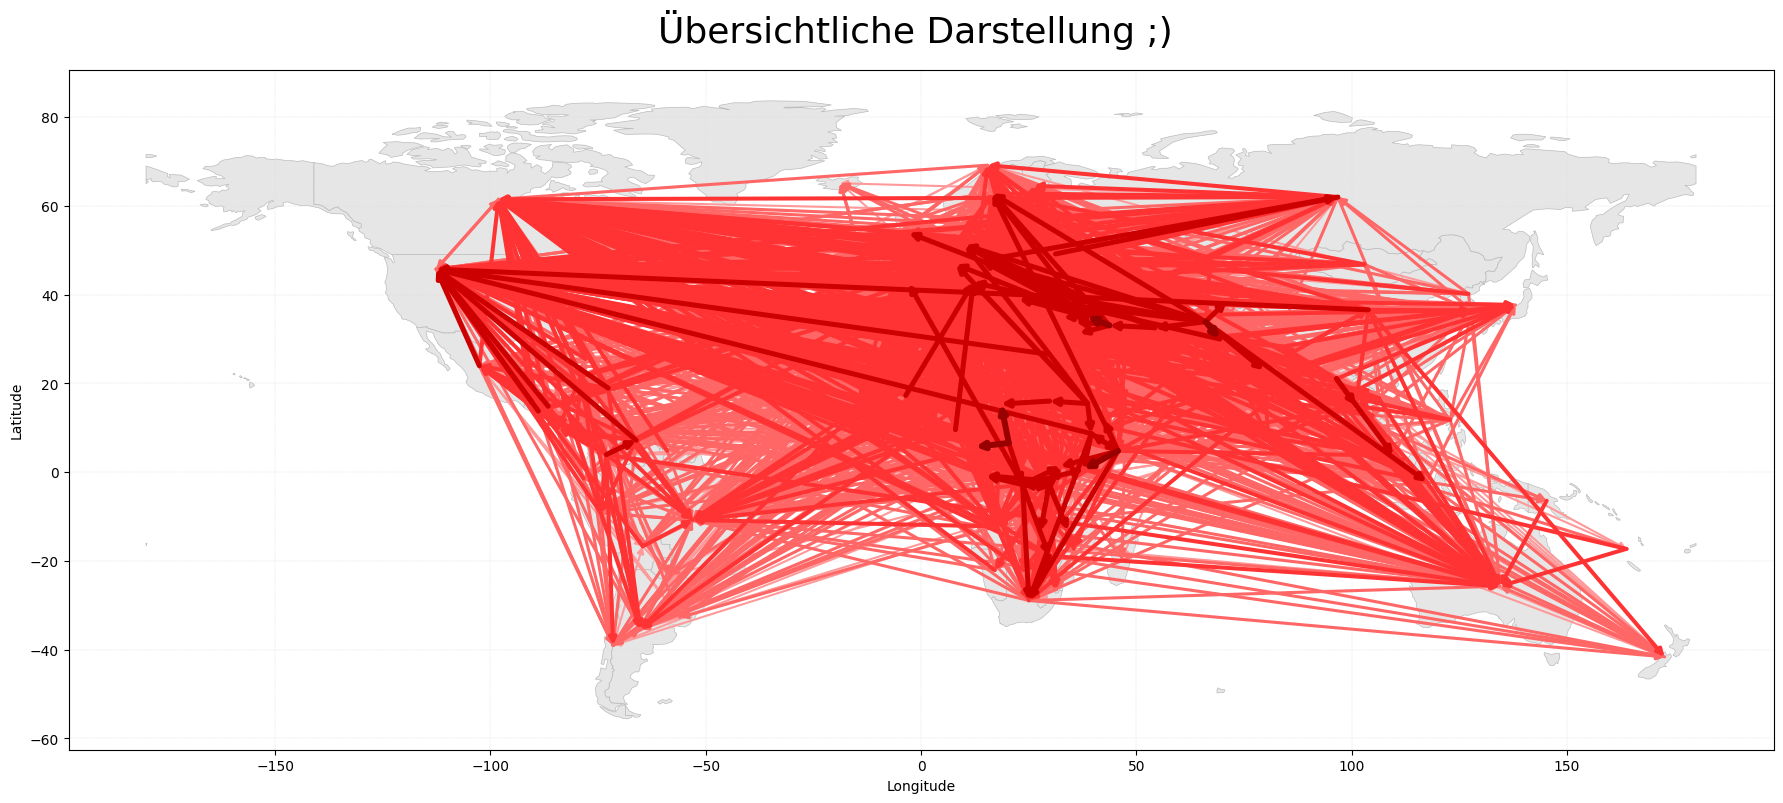

In [68]:
plot_flow_map(world, flows_with_coords, YEAR,title="Übersichtliche Darstellung ;)", max_flows=10000, )


In [69]:
# Dictionary: country -> continent
COUNTRY_TO_CONTINENT = dict(zip(world["country"], world["continent"]))

def get_continent(country):
    return COUNTRY_TO_CONTINENT.get(country, None)


In [70]:
def filter_by_origin_region(flows, continent):
    return flows[flows["origin_continent"] == continent]


In [71]:
# Annahme: COUNTRY_TO_CONTINENT und get_continent(country) sind schon definiert
# und flows_with_coords enthält mind. Origin_clean, Asylum_clean

def add_continent_columns(flows):
    """Fügt origin_continent und asylum_continent anhand der Ländernamen hinzu."""
    flows = flows.copy()
    flows["origin_continent"] = flows["Origin_clean"].apply(get_continent)
    flows["asylum_continent"] = flows["Asylum_clean"].apply(get_continent)
    return flows

# neu zuweisen
flows_with_coords = add_continent_columns(flows_with_coords)


In [72]:
# Prüfen, ob die neuen Spalten existieren und sinnvoll aussehen
print(flows_with_coords[[
    "Origin_clean", "origin_continent",
    "Asylum_clean", "asylum_continent"
]].head())

print("\nAnteil fehlender origin_continent:",
      flows_with_coords["origin_continent"].isna().mean())


  Origin_clean origin_continent Asylum_clean asylum_continent
0  Afghanistan             Asia  Afghanistan             Asia
1  Afghanistan             Asia      Algeria           Africa
2  Afghanistan             Asia       Angola           Africa
3  Afghanistan             Asia    Argentina    South America
4  Afghanistan             Asia      Armenia             Asia

Anteil fehlender origin_continent: 0.03625862345579978


In [73]:
def plot_all_continents(world, flows, year, max_flows=300):
    """
    Erstellt für jeden Kontinent einen eigenen Flow-Plot.
    Der Titel wird automatisch passend gesetzt.
    """

    regions = {
        "Europe": "Europe",
        "Asia": "Asia",
        "Africa": "Africa",
        "North America": "North America",
        "South America": "South America",
        "Oceania": "Oceania"
    }

    for region_name, continent_key in regions.items():
        region_flows = flows[flows["origin_continent"] == continent_key]

        if region_flows.empty:
            print(f"Übersprungen: keine Flows aus {region_name}.")
            continue

        title = f"Refugee Flows from {region_name}"
        print(f"Plot für {region_name} mit {len(region_flows)} Flows...")

        plot_flow_map(
            world,
            region_flows,
            year,
            title=title,
            max_flows=max_flows
        )


Plot für Europe mit 685 Flows...


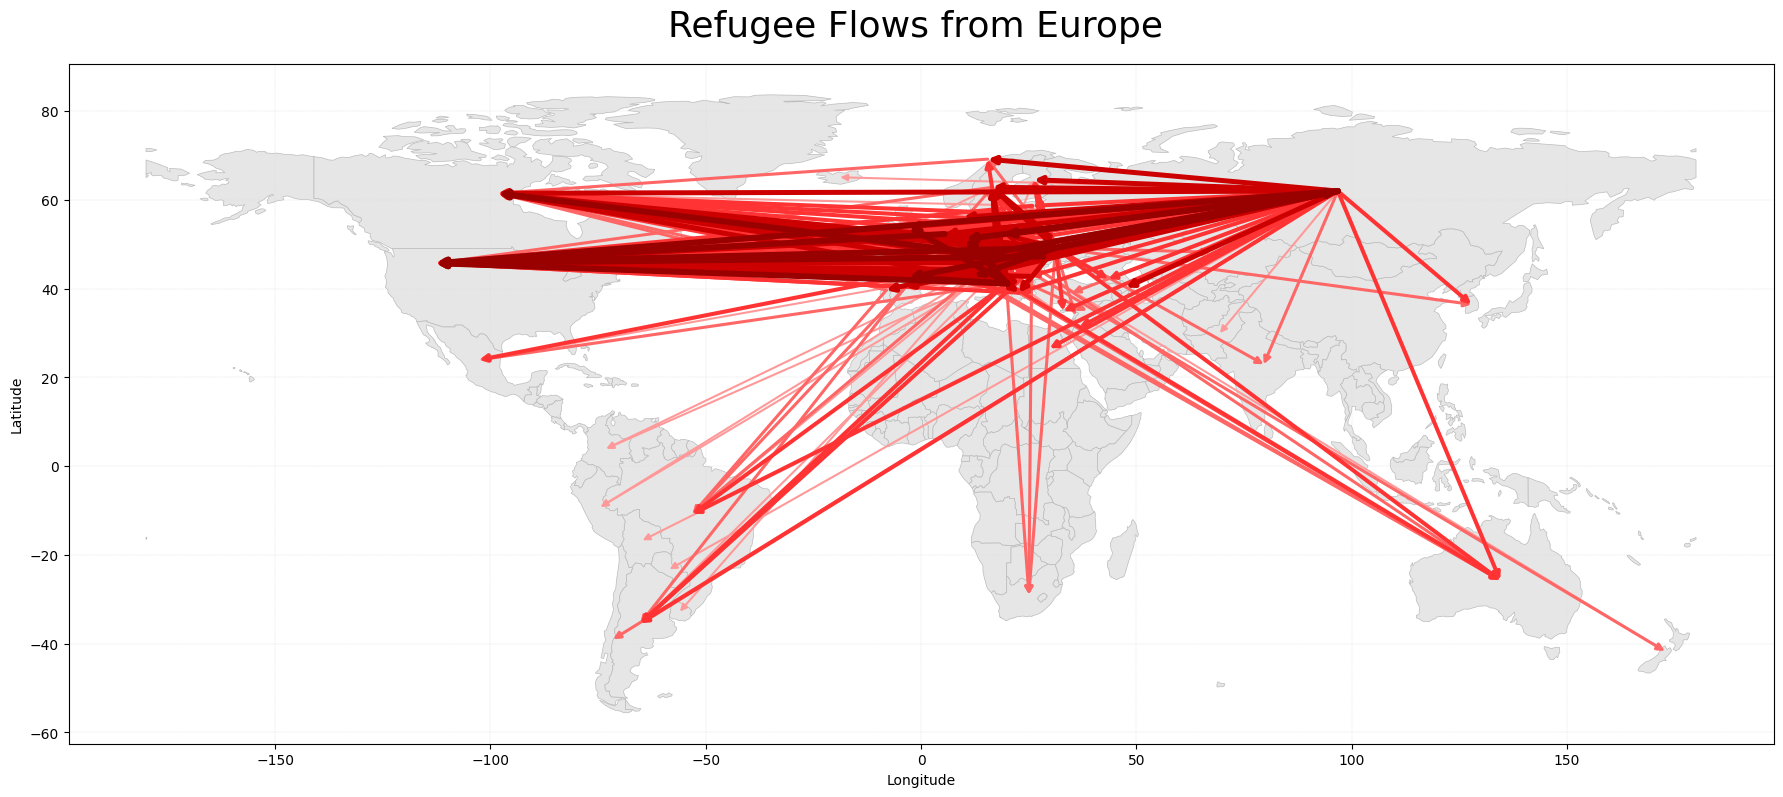

Plot für Asia mit 2022 Flows...


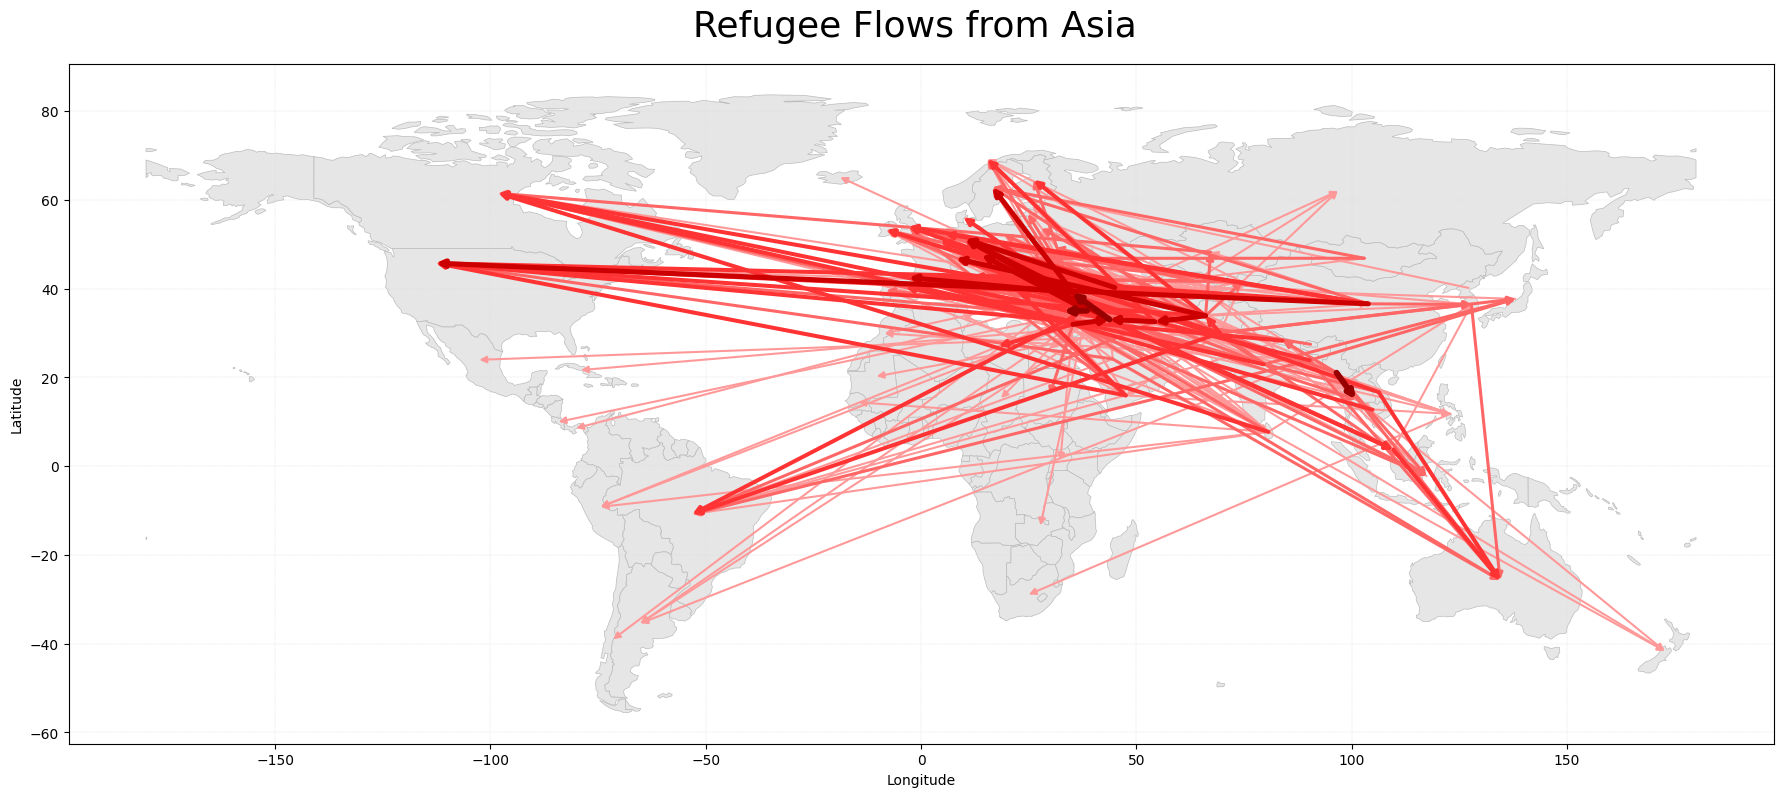

Plot für Africa mit 2619 Flows...


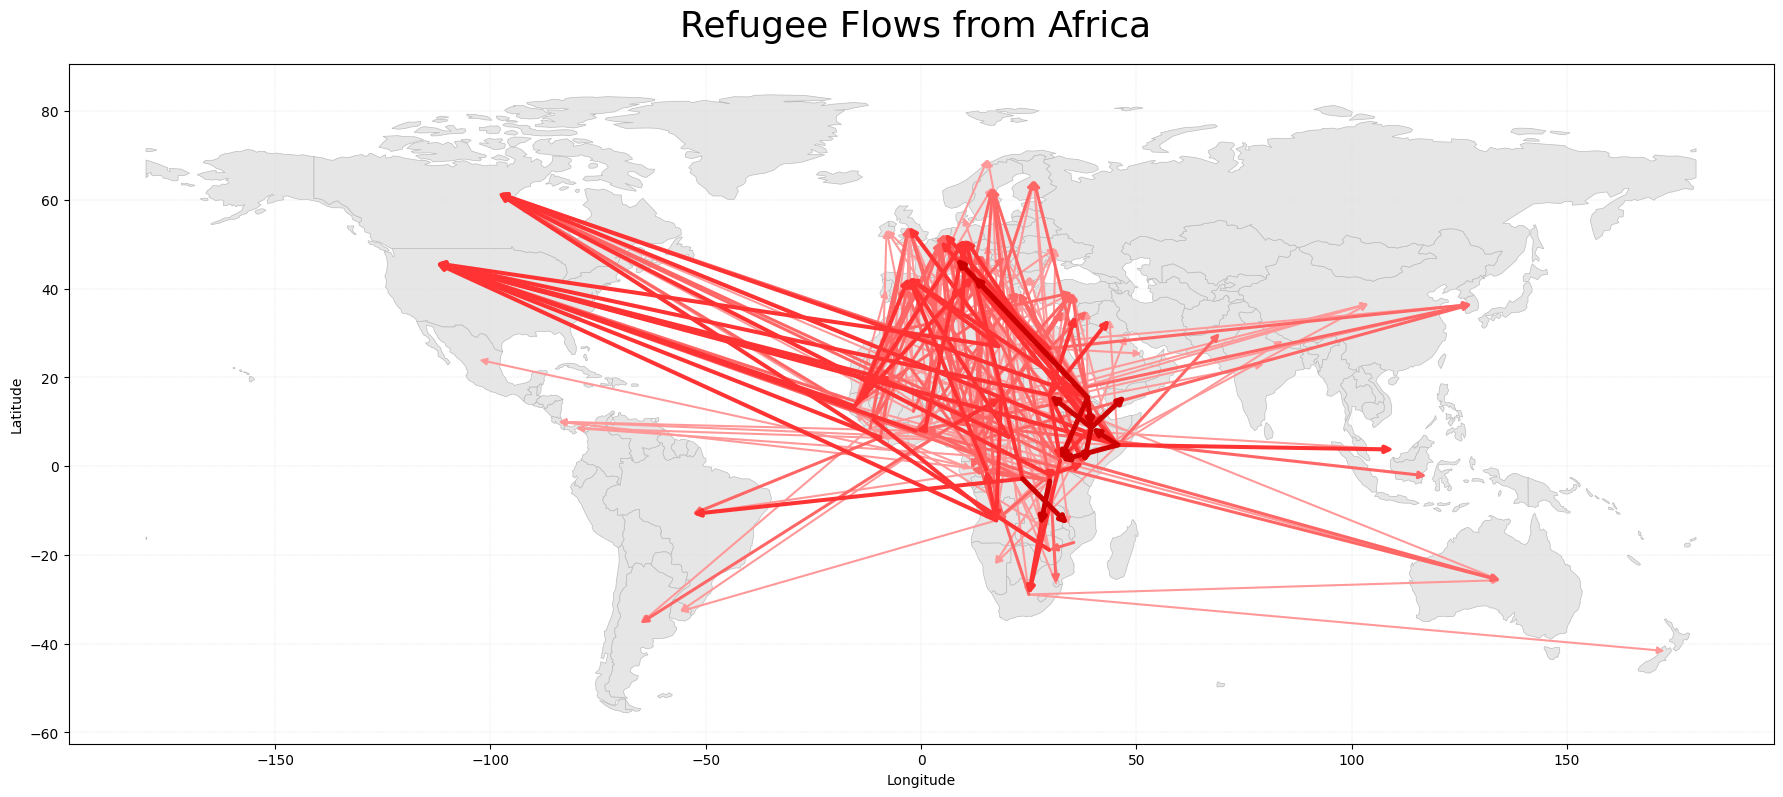

Plot für North America mit 354 Flows...


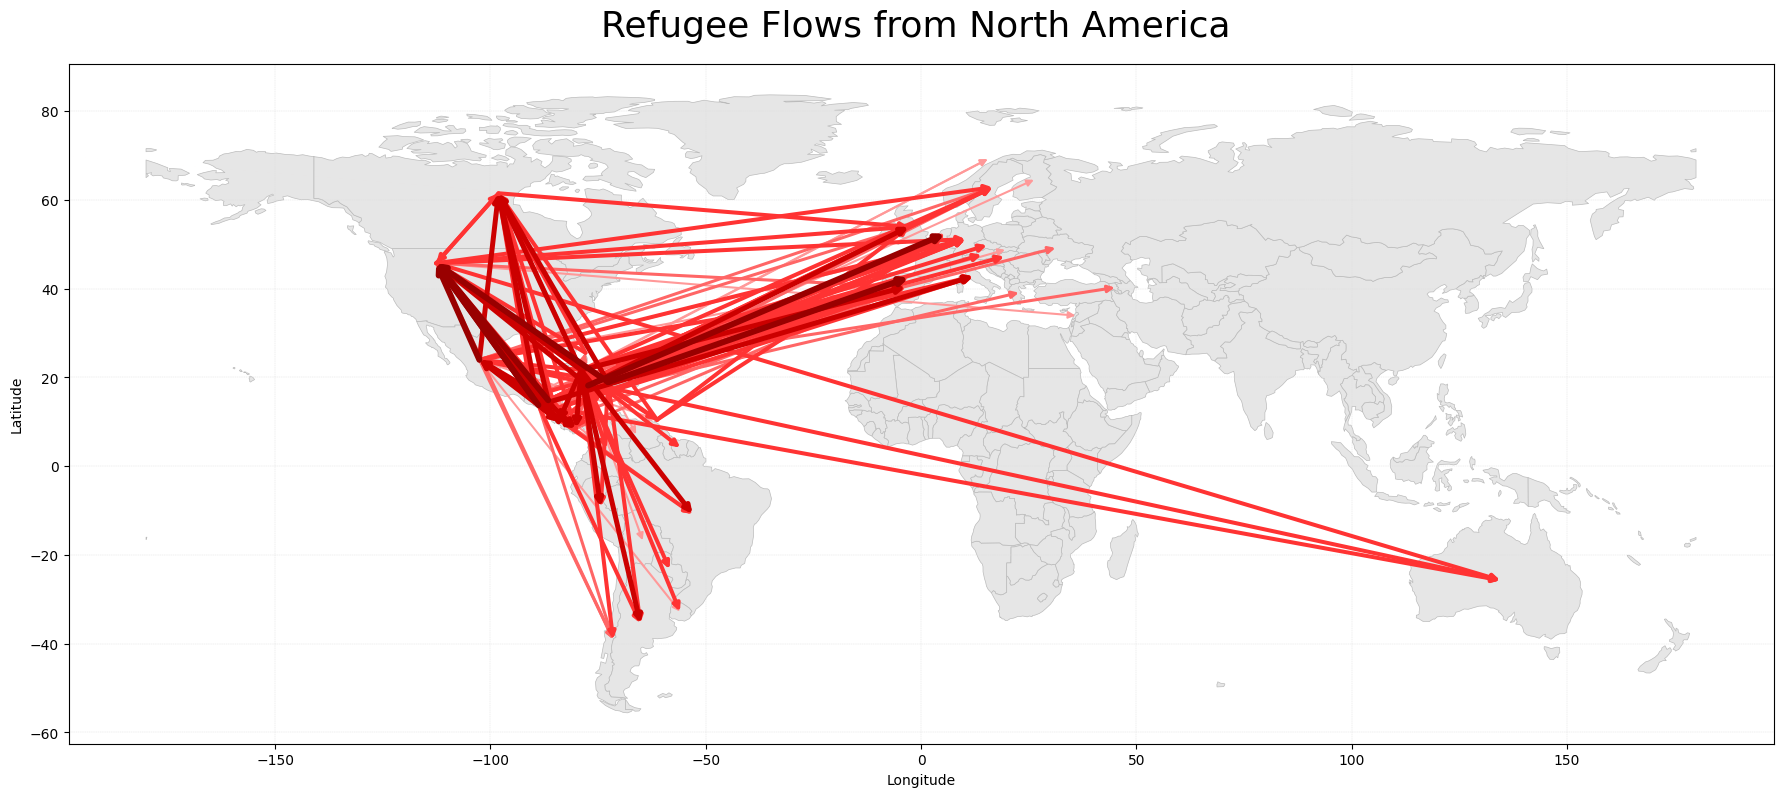

Plot für South America mit 296 Flows...


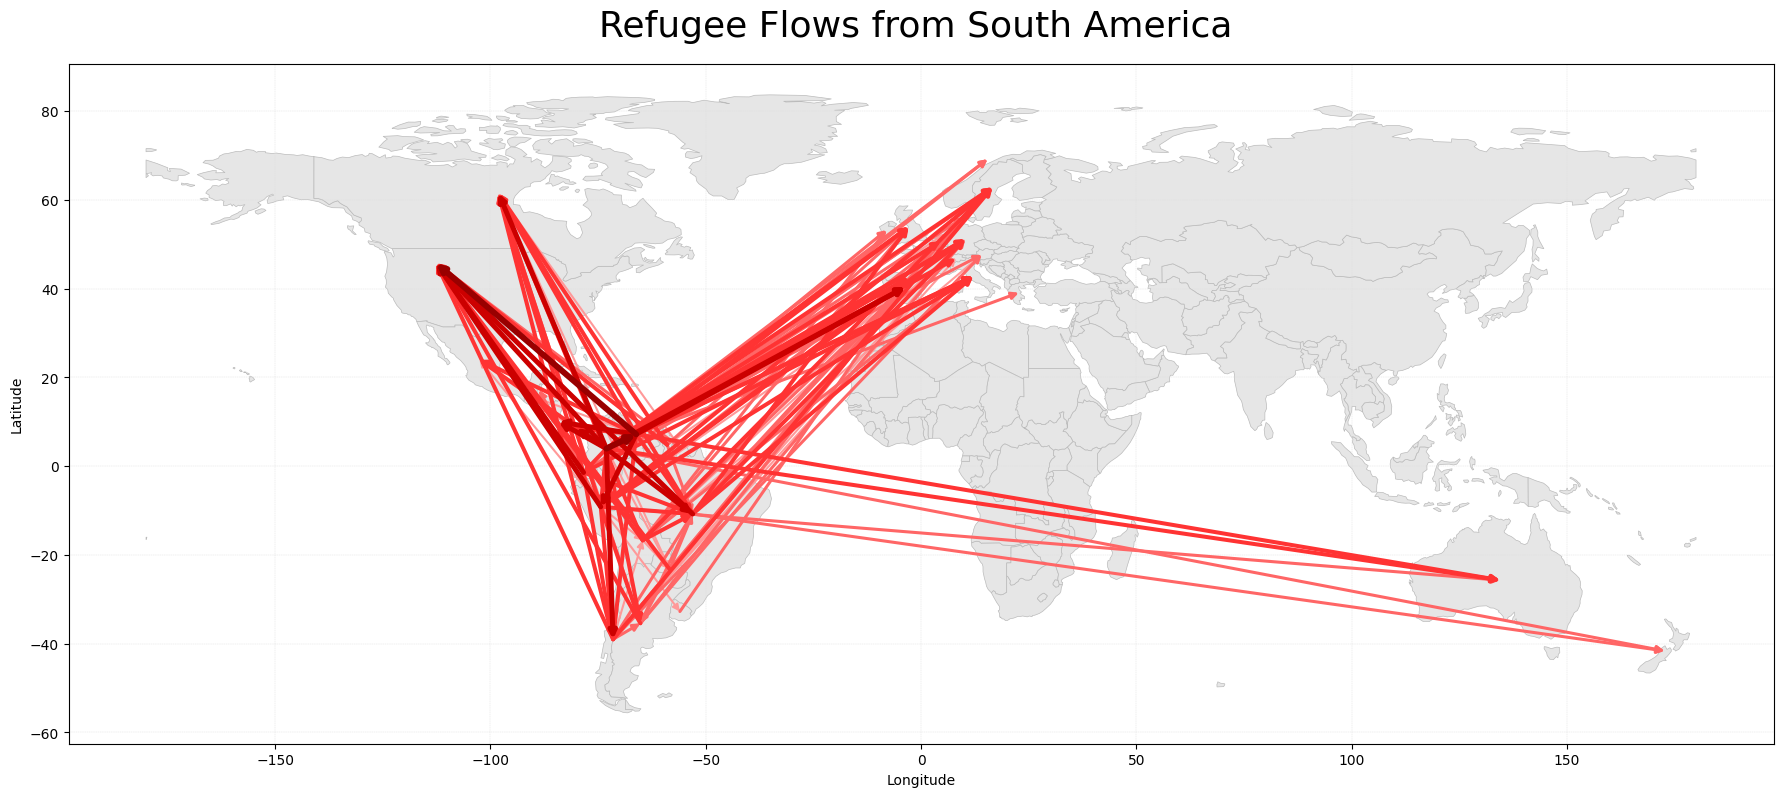

Plot für Oceania mit 31 Flows...


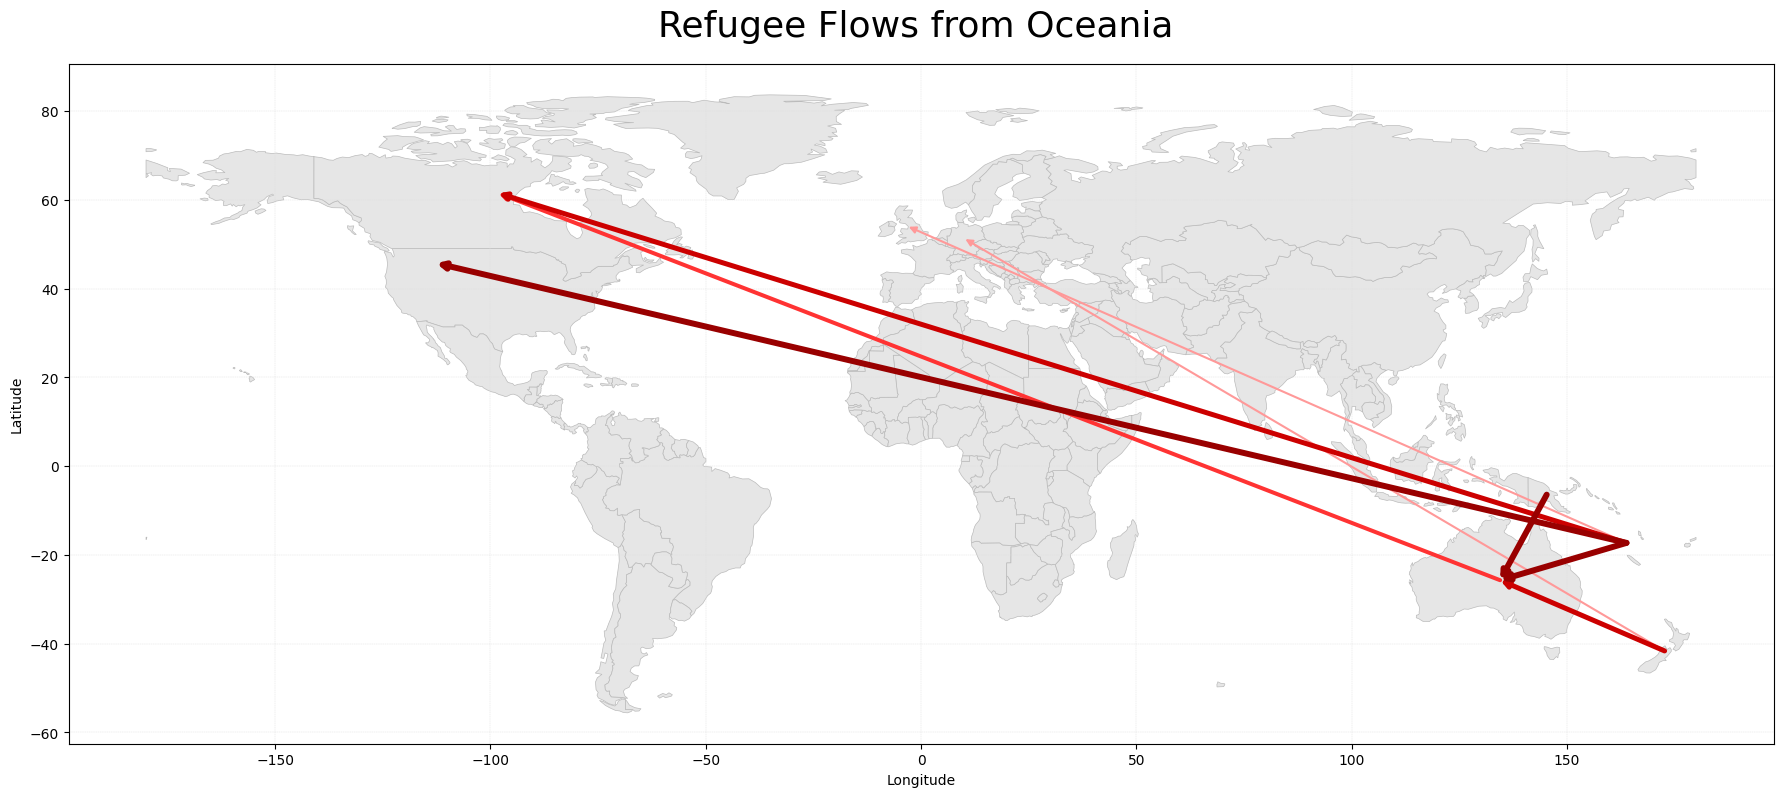

In [74]:
plot_all_continents(world, flows_with_coords, YEAR, max_flows=300)


In [75]:
def filter_by_asylum_region(flows, continent):
    return flows[flows["asylum_continent"] == continent]


In [76]:
def plot_all_continents_inbound(world, flows, year, max_flows=300):
    """
    Erstellt für jeden Kontinent einen Plot:
    zeigt ALLE Flüchtlingsströme, die IN diesen Kontinent kommen.
    """

    regions = {
        "Europe": "Europe",
        "Asia": "Asia",
        "Africa": "Africa",
        "North America": "North America",
        "South America": "South America",
        "Oceania": "Oceania"
    }

    for region_name, continent_key in regions.items():

        region_flows = filter_by_asylum_region(flows, continent_key)

        if region_flows.empty:
            print(f"Übersprungen: keine inbound Flows nach {region_name}.")
            continue

        print(f"Plot für inbound Flows nach {region_name}...")

        title = f"Refugee Inflows INTO {region_name}"

        plot_flow_map(
            world,
            region_flows,
            year,
            title=title,
            max_flows=max_flows
        )


Plot für inbound Flows nach Europe...


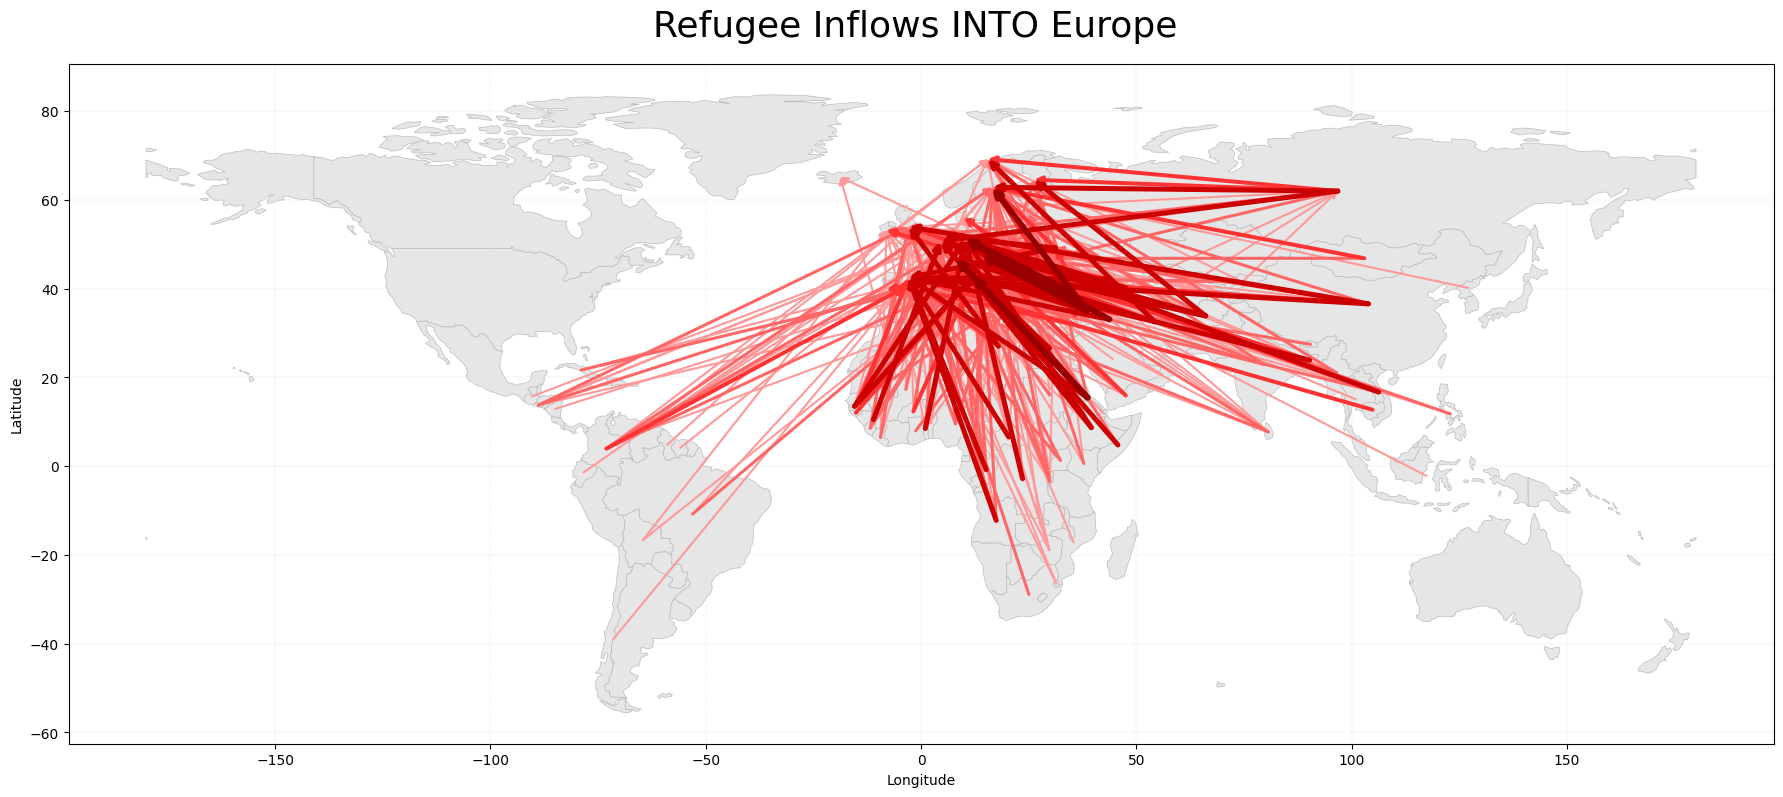

Plot für inbound Flows nach Asia...


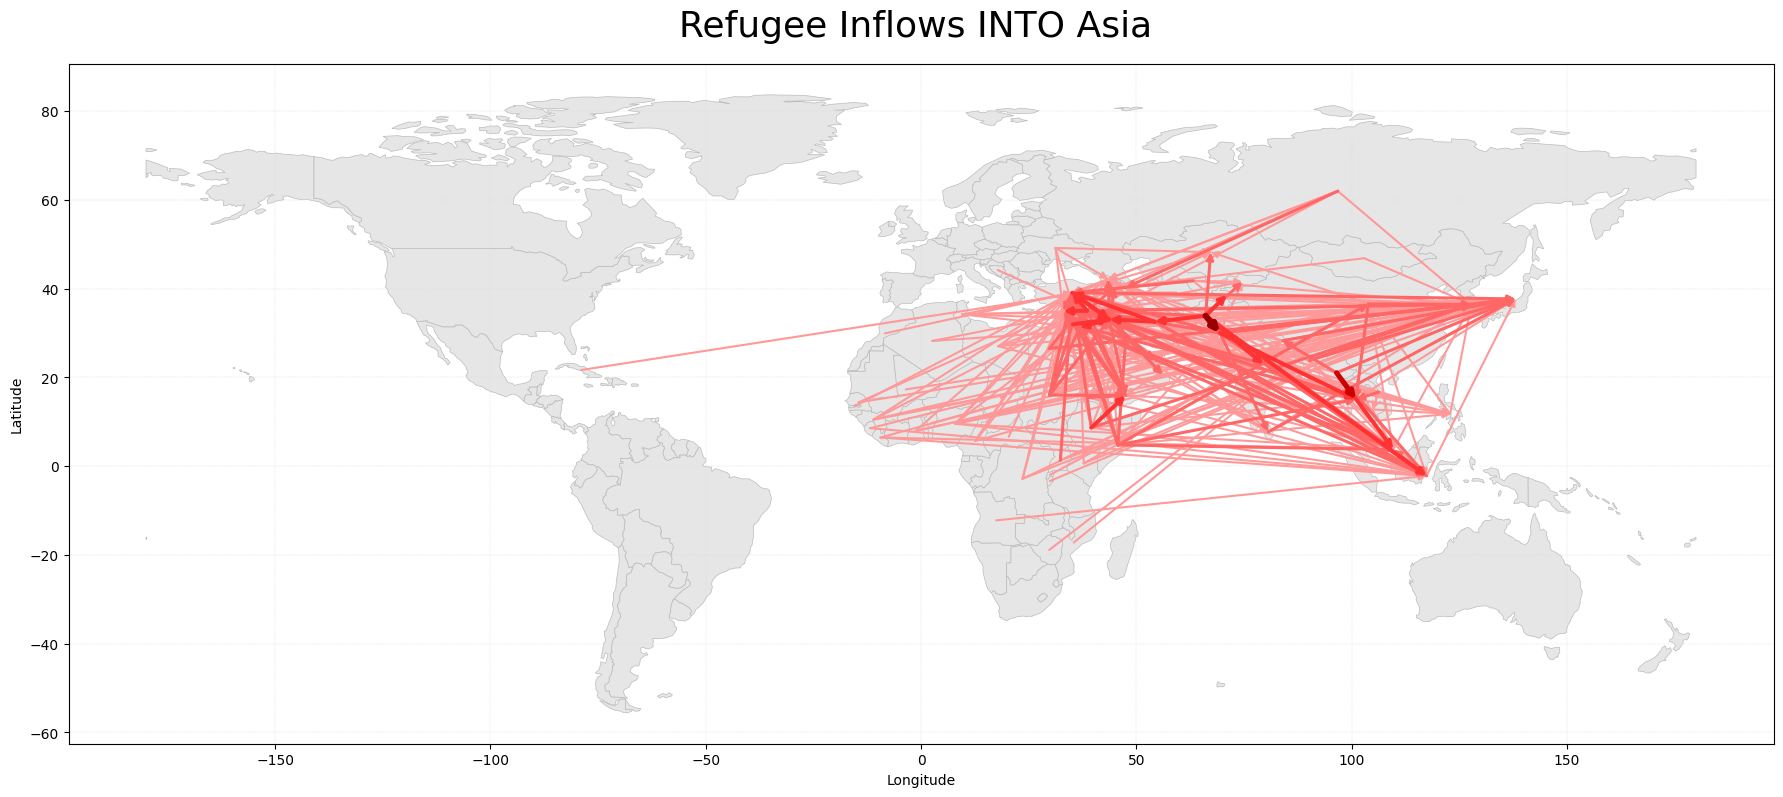

Plot für inbound Flows nach Africa...


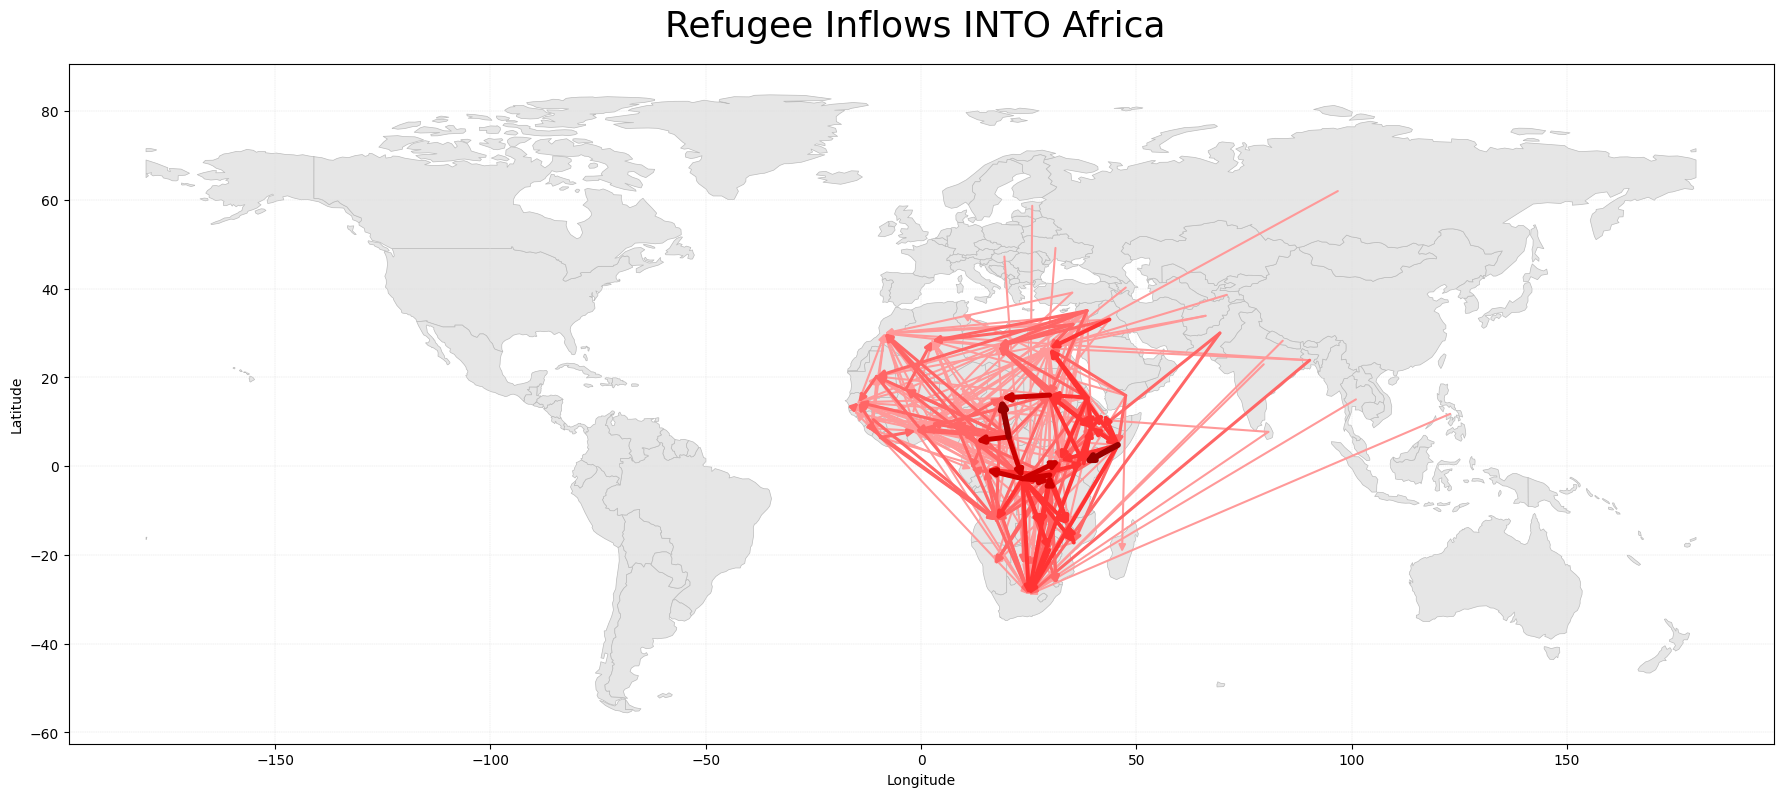

Plot für inbound Flows nach North America...


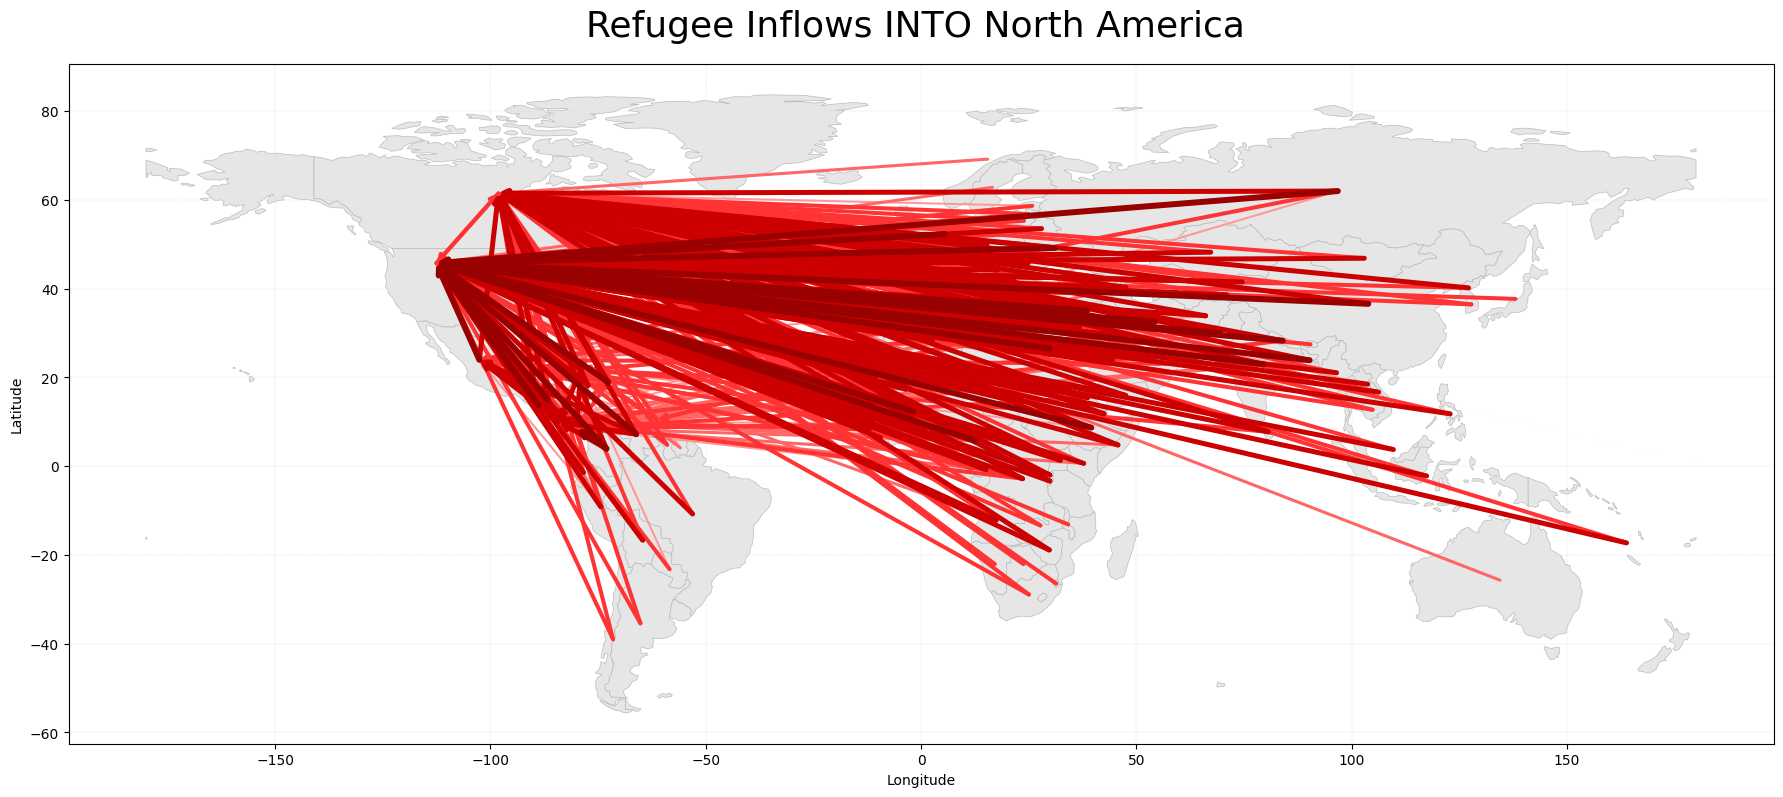

Plot für inbound Flows nach South America...


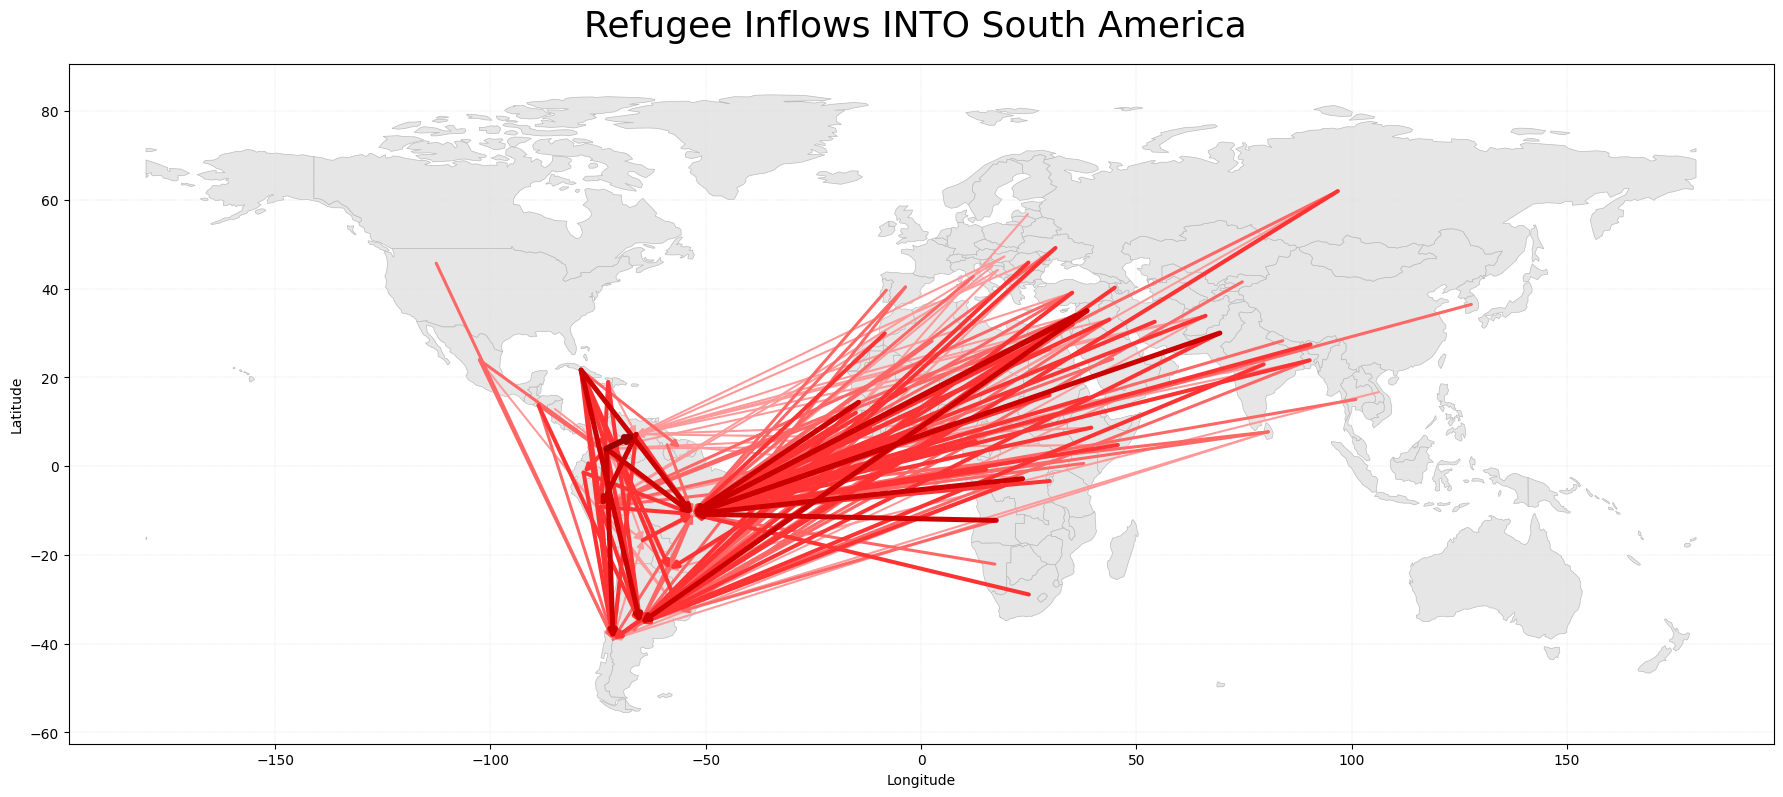

Plot für inbound Flows nach Oceania...


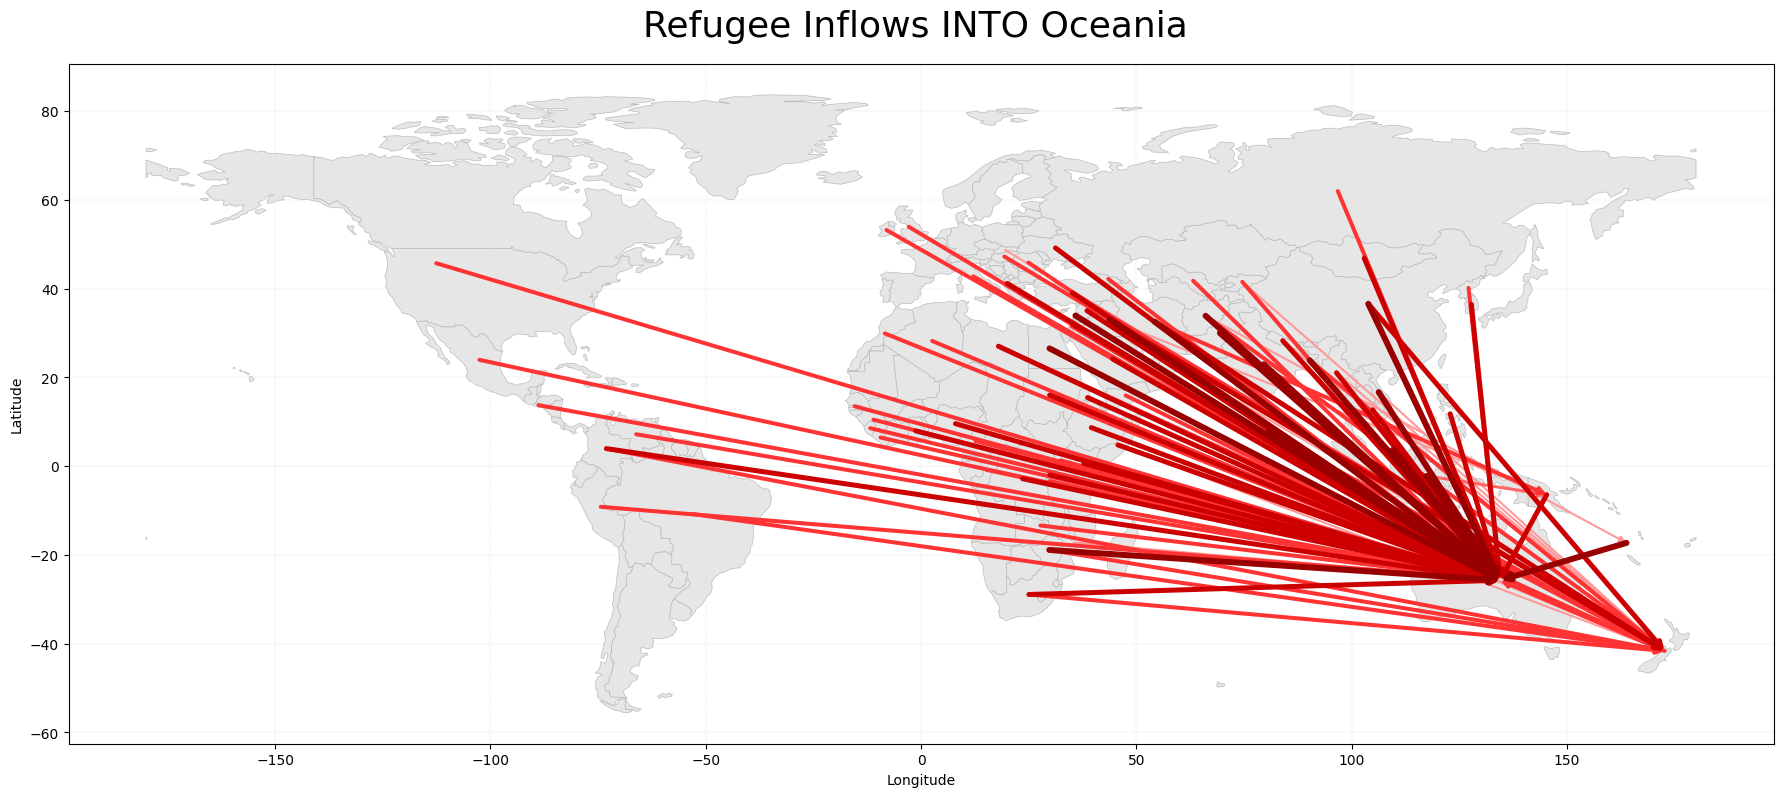

In [77]:
plot_all_continents_inbound(world, flows_with_coords, YEAR, max_flows=400)


In [78]:
def filter_from_country(flows, country):
    return flows[flows["Origin_clean"] == country]


In [79]:
def filter_into_country(flows, country):
    return flows[flows["Asylum_clean"] == country]


In [80]:
def plot_country_flows(world, flows, year, country, max_flows=300):
    """
    Erstellt zwei Plots:
    - FROM <country>
    - INTO <country>
    """

    # FROM
    flows_from = filter_from_country(flows, country)
    if flows_from.empty:
        print(f"Keine FROM-Flows aus {country}")
    else:
        print(f"Erstelle FROM-Plot für {country}...")
        title_from = f"Refugee Flows FROM {country}"
        plot_flow_map(world, flows_from, year, f"Geflüchtet von {country}", max_flows=max_flows)

    # INTO
    flows_into = filter_into_country(flows, country)
    if flows_into.empty:
        print(f"Keine INTO-Flows nach {country}")
    else:
        print(f"Erstelle INTO-Plot für {country}...")
        title_into = f"Refugee Flows INTO {country}"
        plot_flow_map(world, flows_into, year, f"Geflüchtet nach {country}", max_flows=max_flows)


Erstelle FROM-Plot für Afghanistan...


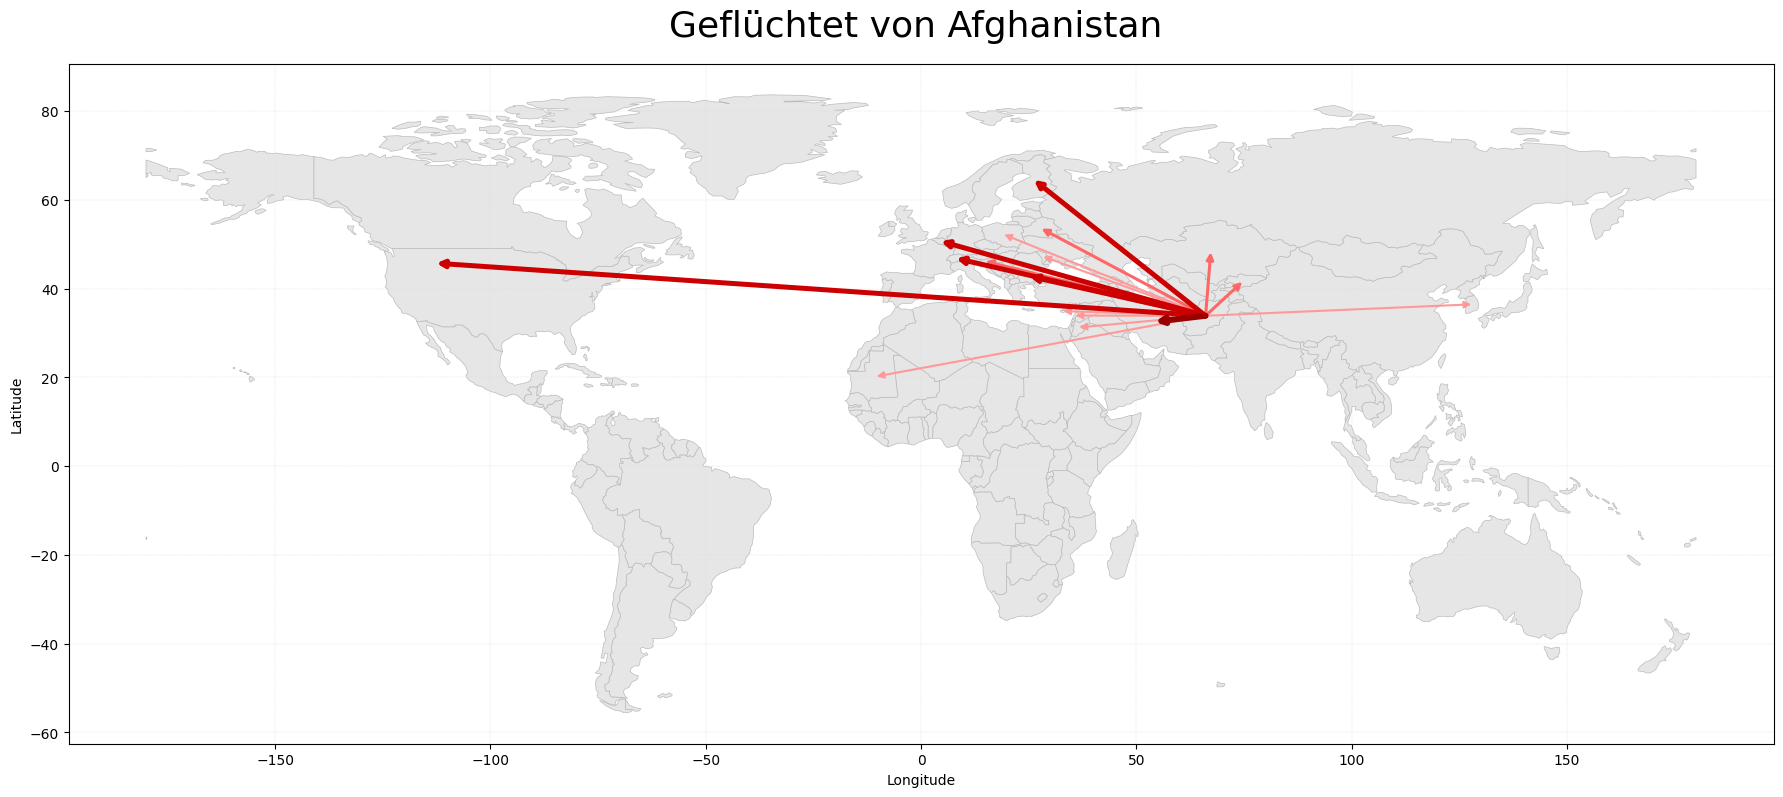

Erstelle INTO-Plot für Afghanistan...


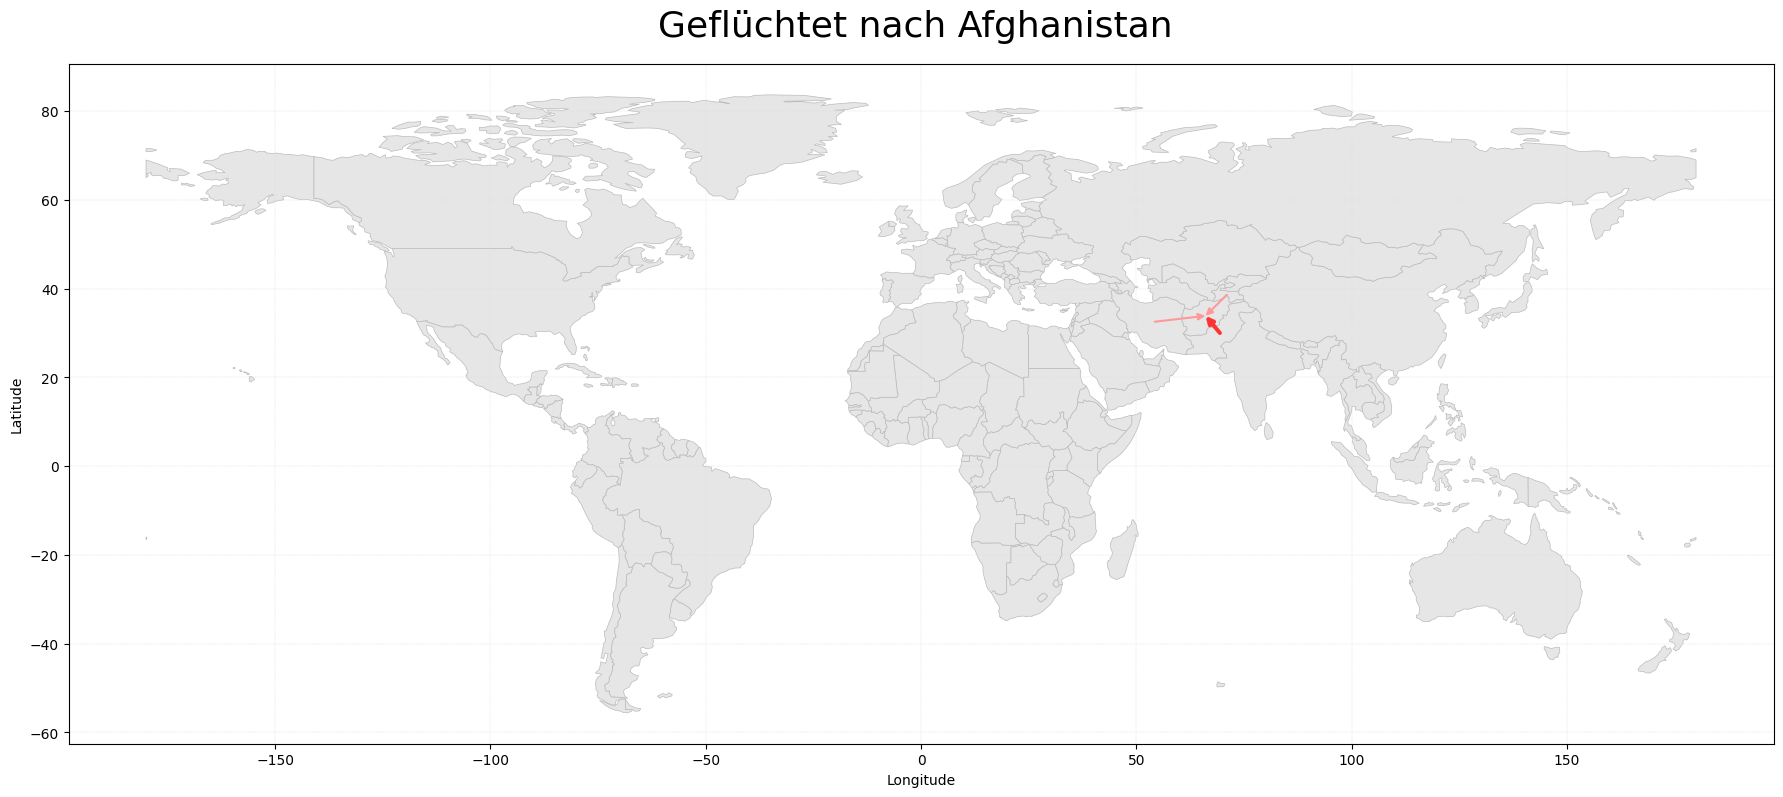

In [81]:
plot_country_flows(world, flows_with_coords, 2016, "Afghanistan", max_flows=20)


In [82]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def build_particles(flows,
                    person_unit=1000,
                    max_flows=200,
                    max_people_per_flow=15,
                    random_state=42):

    rng = np.random.default_rng(random_state)

    flows_sorted = flows.copy()

    # Value wirklich zu Zahlen machen
    flows_sorted["Value"] = pd.to_numeric(flows_sorted["Value"], errors="coerce")

    # Zeilen entfernen, wo Value oder Koordinaten fehlen
    flows_sorted = flows_sorted.dropna(
        subset=["Value", "origin_lon", "origin_lat", "asylum_lon", "asylum_lat"]
    )

    # stärkste Flows zuerst
    flows_sorted = flows_sorted.sort_values("Value", ascending=False).head(max_flows)

    particle_start_x = []
    particle_start_y = []
    particle_end_x = []
    particle_end_y = []

    for _, row in flows_sorted.iterrows():
        value = row["Value"]

        # value ist jetzt numerisch oder NaN, pd.isna ist sicher
        if pd.isna(value):
            continue

        n_people = int(value // person_unit)
        if n_people <= 0:
            continue

        n_people = min(n_people, max_people_per_flow)

        ox, oy = row["origin_lon"], row["origin_lat"]
        ax_, ay_ = row["asylum_lon"], row["asylum_lat"]

        jitter_scale = 0.5
        jitter_o_x = rng.normal(0, jitter_scale, size=n_people)
        jitter_o_y = rng.normal(0, jitter_scale, size=n_people)
        jitter_a_x = rng.normal(0, jitter_scale, size=n_people)
        jitter_a_y = rng.normal(0, jitter_scale, size=n_people)

        particle_start_x.extend(ox + jitter_o_x)
        particle_start_y.extend(oy + jitter_o_y)
        particle_end_x.extend(ax_ + jitter_a_x)
        particle_end_y.extend(ay_ + jitter_a_y)

    particle_start_x = np.array(particle_start_x)
    particle_start_y = np.array(particle_start_y)
    particle_end_x = np.array(particle_end_x)
    particle_end_y = np.array(particle_end_y)

    print(f"Erzeugte Partikel: {len(particle_start_x)}")
    return particle_start_x, particle_start_y, particle_end_x, particle_end_y



In [83]:
# %%
def animate_flows(world,
                  flows,
                  year,
                  title="Animated Refugee Flows",
                  person_unit=1000,
                  max_flows=200,
                  max_people_per_flow=15,
                  frames_per_cycle=80,
                  cycles=3,
                  marker_size=10):
    """
    Erstellt eine Animation von Punkten, die von Origin zu Destination wandern.
    Jeder Punkt repräsentiert person_unit Menschen.
    Die Animation läuft cycles mal durch einen vollen Zyklus von Start nach Ziel.
    """

    # Partikel aus den Flows erzeugen
    sx, sy, ex, ey = build_particles(
        flows,
        person_unit=person_unit,
        max_flows=max_flows,
        max_people_per_flow=max_people_per_flow
    )

    if len(sx) == 0:
        print("Keine Partikel erzeugt. Prüfe person_unit oder Filter.")
        return None

    # Anzahl Frames
    total_frames = frames_per_cycle * cycles

    # Figur und Achse
    fig, ax = plt.subplots(figsize=(22, 12))

    # Hintergrundkarte
    world.plot(ax=ax, color="#E6E6E6", edgecolor="#BBBBBB", linewidth=0.5)

    # Startpositionen initial setzen
    x_init = sx
    y_init = sy

    scat = ax.scatter(x_init, y_init, s=marker_size, alpha=0.8, color="#cc0000")

    ax.set_title(f"{title} ", fontsize=26, pad=20)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(color="#DDDDDD", linestyle="--", linewidth=0.3)

    # Achsenbegrenzungen leicht erweitern
    all_x = np.concatenate([sx, ex])
    all_y = np.concatenate([sy, ey])
    margin_x = (all_x.max() - all_x.min()) * 0.05
    margin_y = (all_y.max() - all_y.min()) * 0.05
    ax.set_xlim(all_x.min() - margin_x, all_x.max() + margin_x)
    ax.set_ylim(all_y.min() - margin_y, all_y.max() + margin_y)

    def update(frame):
        # frame in zyklischen Fortschritt t in [0, 1] umrechnen
        phase = frame % frames_per_cycle
        t = phase / frames_per_cycle

        # lineare Interpolation
        x = sx + t * (ex - sx)
        y = sy + t * (ey - sy)

        offsets = np.column_stack([x, y])
        scat.set_offsets(offsets)

        return scat,

    anim = FuncAnimation(
        fig,
        update,
        frames=total_frames,
        interval=50,  # Millisekunden pro Frame
        blit=True
    )

    plt.close(fig)  # verhindert doppelte statische Anzeige in Jupyter

    return anim


In [84]:
# %%
import matplotlib as mpl
from IPython.display import Video

mpl.rcParams['animation.embed_limit'] = 300  # 50 MB erlauben

anim = animate_flows(
    world,
    flows_with_coords,
    year=2016,
    title="Globale Flüchtlingsbewegungen (2016)",
    person_unit=5000,          # 1 Punkt = 1000 Menschen
    max_flows=1000,             # nur die 200 stärksten Flows
    max_people_per_flow=15,    # höchstens 15 Punkte pro Flow
    frames_per_cycle=80,
    cycles=2,
    marker_size=12
)

if anim is not None:
    HTML(anim.to_jshtml())
# %%
if anim is not None:
    anim.save("output_gifs/refugee_animation_5000_langsam.gif", writer="pillow", fps=10)
    print("GIF gespeichert als refugee_animation.gif")





Erzeugte Partikel: 15000
GIF gespeichert als refugee_animation.gif


In [85]:
# %%
# Value-Spalte bereinigen (zwingend nötig!)
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

print("Nicht-konvertierbare Werte:", df["Value"].isna().sum())


Nicht-konvertierbare Werte: 4208


In [86]:
# %%
def filter_year(df, year):
    df_year = df[df["Year"] == year].copy()

    df_year["Origin_clean"] = df_year["Origin"].apply(normalize_name)
    df_year["Asylum_clean"] = df_year["Country / territory of asylum/residence"].apply(normalize_name)

    # Entferne problematische Zeilen
    df_year = df_year.dropna(subset=["Origin_clean", "Asylum_clean", "Value"])

    return df_year


In [87]:
# %%
def build_flows_timeseries(df, world, start_year, end_year):
    """
    Liefert ein Dictionary {year: flows_with_coords} für eine Zeitspanne.
    """
    data = {}

    for year in range(start_year, end_year + 1):
        df_year = filter_year(df, year)
        flows = aggregate_flows(df_year)
        flows_coords = attach_coordinates(flows, world)
        data[year] = flows_coords

        print(f"Jahr {year}: {len(flows_coords)} Flows")

    return data


In [88]:
# %%
def get_inflows_into_country(flows_dict, country):
    inbound = {}
    for year, flows in flows_dict.items():
        inbound[year] = flows[flows["Asylum_clean"] == country]
    return inbound


In [89]:
# %%
def get_outflows_from_country(flows_dict, country):
    outbound = {}
    for year, flows in flows_dict.items():
        outbound[year] = flows[flows["Origin_clean"] == country]
    return outbound


In [90]:
# %%
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

def animate_timeseries(world,
                       flows_by_year,
                       title="Refugee Flows",
                       person_unit=100,
                       max_flows=120,
                       max_people_per_flow=8,
                       frames_per_year=40,
                       marker_size=10):

    years = sorted(flows_by_year.keys())

    print("Erzeuge Partikel für jedes Jahr...")

    # Partikel vorbereiten
    particles_per_year = {}

    for year in years:
        flows = flows_by_year[year]
        sx, sy, ex, ey = build_particles(
            flows,
            person_unit=person_unit,
            max_flows=max_flows,
            max_people_per_flow=max_people_per_flow
        )
        particles_per_year[year] = (sx, sy, ex, ey)
        print(f"Jahr {year}: {len(sx)} Partikel")

    # Plot Basis
    fig, ax = plt.subplots(figsize=(22, 12))
    world.plot(ax=ax, color="#E6E6E6", edgecolor="#BBBBBB", linewidth=0.5)
    scat = ax.scatter([], [], s=marker_size, color="#cc0000", alpha=0.8)

    ax.grid(color="#DDDDDD", linestyle="--", linewidth=0.3)

    total_frames = len(years) * frames_per_year

    def update(frame):
        year_idx = frame // frames_per_year
        t = (frame % frames_per_year) / frames_per_year

        year = years[year_idx]
        sx, sy, ex, ey = particles_per_year[year]

        x = sx + t * (ex - sx)
        y = sy + t * (ey - sy)

        scat.set_offsets(np.column_stack([x, y]))
        ax.set_title(title, fontsize=22)

        return scat,

    anim = FuncAnimation(
        fig,
        update,
        frames=total_frames,
        interval=50,
        blit=True
    )

    plt.close(fig)
    return anim


In [91]:
import matplotlib as mpl
from IPython.display import Video

mpl.rcParams['animation.embed_limit'] = 100 

# %%
flows_dict = build_flows_timeseries(df, world, 2000, 2016)
# %%
inflows_ch = get_inflows_into_country(flows_dict, "Switzerland")
# %%
anim_in = animate_timeseries(
    world,
    inflows_ch,
    title="Flüchtlingsströme in die Schweiz (2000-2016)",
    person_unit=100,
    max_flows=200,
    max_people_per_flow=7,
    frames_per_year=40
)

anim_in.save("Output_gifs/Schweiz_inflows_1979_2016.gif", writer="pillow", fps=10)



Jahr 2000: 3841 Flows
Jahr 2001: 4051 Flows
Jahr 2002: 4215 Flows
Jahr 2003: 4456 Flows
Jahr 2004: 4574 Flows
Jahr 2005: 4718 Flows
Jahr 2006: 4881 Flows
Jahr 2007: 5744 Flows
Jahr 2008: 5886 Flows
Jahr 2009: 5928 Flows
Jahr 2010: 6111 Flows
Jahr 2011: 6312 Flows
Jahr 2012: 6486 Flows
Jahr 2013: 6634 Flows
Jahr 2014: 6949 Flows
Jahr 2015: 6311 Flows
Jahr 2016: 6233 Flows
Erzeuge Partikel für jedes Jahr...
Erzeugte Partikel: 136
Jahr 2000: 136 Partikel
Erzeugte Partikel: 156
Jahr 2001: 156 Partikel
Erzeugte Partikel: 168
Jahr 2002: 168 Partikel
Erzeugte Partikel: 144
Jahr 2003: 144 Partikel
Erzeugte Partikel: 129
Jahr 2004: 129 Partikel
Erzeugte Partikel: 132
Jahr 2005: 132 Partikel
Erzeugte Partikel: 139
Jahr 2006: 139 Partikel
Erzeugte Partikel: 137
Jahr 2007: 137 Partikel
Erzeugte Partikel: 161
Jahr 2008: 161 Partikel
Erzeugte Partikel: 162
Jahr 2009: 162 Partikel
Erzeugte Partikel: 159
Jahr 2010: 159 Partikel
Erzeugte Partikel: 169
Jahr 2011: 169 Partikel
Erzeugte Partikel: 178
Jahr

In [92]:
for year, flows in inflows_ch.items():
    print(year, len(flows))


2000 116
2001 118
2002 119
2003 113
2004 119
2005 114
2006 115
2007 129
2008 131
2009 131
2010 129
2011 133
2012 138
2013 137
2014 148
2015 120
2016 124


In [93]:
import matplotlib as mpl
from IPython.display import Video

mpl.rcParams['animation.embed_limit'] = 100  # 50 MB erlauben

# %%
flows_dict = build_flows_timeseries(df, world, 2000, 2016)
# %%
outflows_ch = get_outflows_from_country(flows_dict, "Afghanistan")
# %%

anim_out = animate_timeseries(
    world,
    outflows_ch,
    title="Flüchtlingsströme  aus Afghanistan 1979-2016",
    person_unit=500,
    max_flows=200,
    max_people_per_flow=7,
    frames_per_year=40
)

anim_out.save("Output_gifs/Afghanistan_outflows_1979_2016.gif", writer="pillow", fps=10)



Jahr 2000: 3841 Flows
Jahr 2001: 4051 Flows
Jahr 2002: 4215 Flows
Jahr 2003: 4456 Flows
Jahr 2004: 4574 Flows
Jahr 2005: 4718 Flows
Jahr 2006: 4881 Flows
Jahr 2007: 5744 Flows
Jahr 2008: 5886 Flows
Jahr 2009: 5928 Flows
Jahr 2010: 6111 Flows
Jahr 2011: 6312 Flows
Jahr 2012: 6486 Flows
Jahr 2013: 6634 Flows
Jahr 2014: 6949 Flows
Jahr 2015: 6311 Flows
Jahr 2016: 6233 Flows
Erzeuge Partikel für jedes Jahr...
Erzeugte Partikel: 129
Jahr 2000: 129 Partikel
Erzeugte Partikel: 143
Jahr 2001: 143 Partikel
Erzeugte Partikel: 143
Jahr 2002: 143 Partikel
Erzeugte Partikel: 142
Jahr 2003: 142 Partikel
Erzeugte Partikel: 141
Jahr 2004: 141 Partikel
Erzeugte Partikel: 137
Jahr 2005: 137 Partikel
Erzeugte Partikel: 134
Jahr 2006: 134 Partikel
Erzeugte Partikel: 128
Jahr 2007: 128 Partikel
Erzeugte Partikel: 144
Jahr 2008: 144 Partikel
Erzeugte Partikel: 151
Jahr 2009: 151 Partikel
Erzeugte Partikel: 160
Jahr 2010: 160 Partikel
Erzeugte Partikel: 155
Jahr 2011: 155 Partikel
Erzeugte Partikel: 159
Jahr

In [ ]:
# %%
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# === 1) Weltkarte laden ===
world_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/data/custom.geo.json"
world = gpd.read_file(world_path)

# Namensspalte ermitteln
if "name" in world.columns:
    world = world.rename(columns={"name": "country"})
elif "admin" in world.columns:
    world = world.rename(columns={"admin": "country"})
elif "ADMIN" in world.columns:
    world = world.rename(columns={"ADMIN": "country"})

# Optional: kleine Länder filtern (macht Karte ruhiger)
world = world[[len(geom.exterior.coords) > 10 if geom.geom_type == "Polygon" else True
               for geom in world.geometry]]


# === 2) Deinen Datensatz laden ===
csv_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/output_with_continent.csv"
df = pd.read_csv(csv_path)

# Sicherheitscheck
df["Year"] = df["Year"].astype(int)


# === 3) Plot-Funktion (Merge nur für 1 Jahr → 100x schneller) ===
def plot_year(year):
    # Filtere für genau dieses Jahr
    data_year = df[df["Year"] == year]

    # Nur für dieses Jahr mergen
    merged_year = world.merge(
        data_year,
        how="left",
        left_on="country",
        right_on="country"
    )

    # Plot
    fig, ax = plt.subplots(figsize=(22, 12))

    merged_year.plot(
        column="refugee_share",
        cmap="Reds",
        linewidth=0.5,
        edgecolor="#555555",
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "#f0f0f0",
            "edgecolor": "none",
            "label": "No Data"
        }
    )

    ax.set_title(f"Refugee Share Heatmap {year}", fontsize=26)
    ax.axis("off")

    plt.show()


# === 4) Slider mit allen verfügbaren Jahren ===
available_years = sorted(df["Year"].unique().tolist())

interact(
    plot_year,
    year=IntSlider(
        min=min(available_years),
        max=max(available_years),
        step=1,
        value=min(available_years),
        description="Year",
        continuous_update=False
    )
)


interactive(children=(IntSlider(value=1970, continuous_update=False, description='Year', max=2016, min=1970), …

<function __main__.plot_year(year)>

In [96]:
# %%
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

# === 1) Weltkarte laden ===
world_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/data/custom.geo.json"
world = gpd.read_file(world_path)

if "name" in world.columns:
    world = world.rename(columns={"name": "country"})
elif "admin" in world.columns:
    world = world.rename(columns={"admin": "country"})
elif "ADMIN" in world.columns:
    world = world.rename(columns={"ADMIN": "country"})

world = world[[len(geom.exterior.coords) > 10 if geom.geom_type == "Polygon" else True
               for geom in world.geometry]]

# === 2) Daten laden ===
csv_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/output_with_continent.csv"
df = pd.read_csv(csv_path)
df["Year"] = df["Year"].astype(int)

years = sorted(df["Year"].unique())

# === 3) Normierung für Legende (global über alle Jahre!) ===
vmin = df["refugee_share"].min()
vmax = df["refugee_share"].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Reds


# === 4) Animation vorbereiten ===
fig, ax = plt.subplots(figsize=(24, 12))

# Leeres ScalarMappable → Legende bleibt fix
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Feste Legende (nur einmal!)
cbar = fig.colorbar(
    sm,
    ax=ax,
    fraction=0.03,
    pad=0.02
)
cbar.set_label("Refugee Share", fontsize=16)


# === 5) Update-Funktion ===
def update(year):
    ax.clear()

    data_year = df[df["Year"] == year]
    merged_year = world.merge(data_year, on="country", how="left")

    merged_year.plot(
        column="refugee_share",
        cmap="Reds",
        linewidth=0.5,
        edgecolor="black",
        ax=ax,
        legend=False,              # WICHTIG: keine Legende pro Frame!
        missing_kwds={"color": "white", "edgecolor": "black"}
    )

    ax.set_title(f"Flüchtlingsaufnahmequote {year}", fontsize=32)
    ax.axis("off")


# === 6) GIF erzeugen ===
anim = FuncAnimation(
    fig,
    update,
    frames=years,
    interval=500,     # Geschwindigkeit → 500ms = 0.5s pro Frame
    repeat=True
)

gif_path = "output_gifs/refugee_share_clean.gif"
anim.save(gif_path, writer="pillow", fps=4)

plt.close(fig)
print("GIF erstellt:", gif_path)


GIF erstellt: output_gifs/refugee_share_clean.gif


In [97]:
# %%
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

# === 1) Weltkarte laden ===
world_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/data/custom.geo.json"
world = gpd.read_file(world_path)

# Ländernamen angleichen
if "name" in world.columns:
    world = world.rename(columns={"name": "country"})
elif "admin" in world.columns:
    world = world.rename(columns={"admin": "country"})
elif "ADMIN" in world.columns:
    world = world.rename(columns={"ADMIN": "country"})

# winzige Inseln entfernen
world = world[[len(geom.exterior.coords) > 10 if geom.geom_type == "Polygon" else True
               for geom in world.geometry]]


# === 2) Origin-Daten laden ===
csv_path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Origin_refugees_per_capita.csv"
df = pd.read_csv(csv_path)

df["Year"] = df["Year"].astype(int)
years = sorted(df["Year"].unique())


# === 3) globale Farbskala bestimmen ===
vmin = df["refugee_share"].min()
vmax = df["refugee_share"].max()

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Reds


# === 4) Figur + feste Legende erstellen ===
fig, ax = plt.subplots(figsize=(24, 12))

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cbar = fig.colorbar(
    sm,
    ax=ax,
    fraction=0.03,
    pad=0.02
)
cbar.set_label("Refugee Share (Origin)", fontsize=16)


# === 5) Update-Funktion pro Jahr ===
def update(year):
    ax.clear()

    data_year = df[df["Year"] == year]

    merged = world.merge(
        data_year,
        on="country",
        how="left"
    )

    merged.plot(
        column="refugee_share",
        cmap="Reds",
        linewidth=0.6,
        edgecolor="black",
        ax=ax,
        legend=False,
        missing_kwds={"color": "white", "edgecolor": "black"}
    )

    ax.set_title(
        f"Fluchtquote vom Herkunftsland  {year}",
        fontsize=32
    )
    ax.axis("off")


# === 6) GIF Animation erzeugen ===
anim = FuncAnimation(
    fig,
    update,
    frames=years,
    interval=500,     # 0.5 Sekunden pro Frame
    repeat=True
)

gif_path = "output_gifs/origin_refugee_share.gif"
anim.save(gif_path, writer="pillow", fps=4)

plt.close(fig)
print("GIF erstellt:", gif_path)


GIF erstellt: output_gifs/origin_refugee_share.gif
